In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as my
import seaborn as sns

df=my.connect(
    host="localhost",
    user="root",
    password="vdpwezweb4",
    port=3306,
   database='Anudip_Internship'
)
cr=df.cursor()

#### Dataset Overview:<hr/>
The dataset consists of three main tables:<br/>
  1. "customer" : Contains information about
  - customers,
  - includingtheirID,
  - name,
  - contactdetails,
  - address.

In [129]:
# create a table named 'customer'
sql = """
CREATE TABLE customer (
    customer_id varchar(10) NOT NULL,
    name varchar(100) NOT NULL,
    city varchar(65) NOT NULL,
    email varchar(45) NOT NULL,
    phone_no varchar(15) NOT NULL,
    address varchar(100) NOT NULL,
    pin_code int NOT NULL,
    PRIMARY KEY(customer_id)
);"""
cr.execute(sql)
df.commit()
print("Table 'customer' created successfully")


Table 'customer' created successfully


2. "product" : Contains details about the products available for purchase, including
- productID,
- name,
- category,
- pricing.

In [130]:
# create a table named 'product'
sql = """
CREATE TABLE `product` (
    `product_id` VARCHAR(10) NOT NULL,
    `product_name` VARCHAR(100) NOT NULL,
    `category` VARCHAR(65) NOT NULL,
    `sub_category` VARCHAR(45) NOT NULL,
    `original_price` FLOAT NOT NULL,
    `selling_price` FLOAT NOT NULL,
    PRIMARY KEY(`product_id`)
);
"""
cr.execute(sql)
df.commit()
print("Table 'product' created successfully")

Table 'product' created successfully


3. "order_details": Captures information about customer orders, including 
- order ID,
- customer ID,
- product ID,
- quantity,
- total price,
- payment mode,
- order_date,
- order_status.

In [131]:
# creating a table named 'order_details'
sql = '''
CREATE TABLE `order_details` (
    `order_id` int NOT NULL AUTO_INCREMENT,
    `customer_id` varchar(10) NOT NULL,
    `product_id` varchar(10) NOT NULL,
    `quantity` double NOT NULL,
    `total_price` double NOT NULL,
    `payment_mode` varchar(60) NOT NULL,
    `order_date` datetime DEFAULT NULL,
    `order_status` varchar(20) NOT NULL,
    PRIMARY KEY (`order_id`),
    KEY `customer_id` (`customer_id`),
    KEY `product_id` (`product_id`),
    CONSTRAINT `order_data_ibfk_1` FOREIGN KEY (`customer_id`)
    REFERENCES `customer` (`customer_id`),
    CONSTRAINT `order_data_ibfk_2` FOREIGN KEY (`product_id`)
    REFERENCES `product` (`product_id`)
);''' 
cr.execute(sql)
df.commit()
print("Table 'order_details' created successfully")

Table 'order_details' created successfully


#### Inserting data in above tables<HR/>


In [132]:
# inserting data into the customer table
sql = """
INSERT INTO `customer` (`customer_id`, `name`, `city`, `email`, `phone_no`, `address`, `pin_code`) 
VALUES
('C001', 'Alice Johnson', 'New York', 'alice.johnson@example.com', '212-555-1234', '123 Elm Street', 10001),
('C002', 'Bob Smith', 'Los Angeles', 'bob.smith@example.com', '310-555-5678', '456 Oak Avenue', 90001),
('C003', 'Charlie Brown', 'Chicago', 'charlie.brown@example.com', '312-555-9876', '789 Pine Road', 60601),
('C004', 'Diana Prince', 'San Francisco', 'diana.prince@example.com', '415-555-4321', '101 Maple Lane', 94101),
('C005', 'Ethan Hunt', 'Boston', 'ethan.hunt@example.com', '617-555-6789', '202 Birch Street', 02101),
('C006', 'Fiona Gallagher', 'Chicago', 'fiona.gallagher@example.com', '206-555-3456', '303 Cedar Avenue', 98101),
('C007', 'George Clooney', 'Austin', 'george.clooney@example.com', '512-555-2345', '404 Willow Lane', 73301),
('C008', 'Hannah Montana', 'Denver', 'hannah.montana@example.com', '303-555-6789', '505 Spruce Street', 80201),
('C009', 'Ian Malcolm', 'New York', 'ian.malcolm@example.com', '305-555-7890', '606 Palm Avenue', 33101),
('C010', 'Jane Doe', 'Orlando', 'jane.doe@example.com', '407-555-1234', '707 Magnolia Drive', 32801),
('C011', 'Kurt Cobain', 'New York', 'kurt.cobain@example.com', '212-555-5678', '123 Main Street', 10002),
('C012', 'Laura Palmer', 'Orlando', 'laura.palmer@example.com', '310-555-1234', '456 Elm Avenue', 90002),
('C013', 'Michael Scott', 'Chicago', 'michael.scott@example.com', '312-555-4321', '789 Oak Road', 60602),
('C014', 'Nancy Drew', 'San Francisco', 'nancy.drew@example.com', '415-555-6789', '101 Pine Lane', 94102),
('C015', 'Oscar Wilde', 'Boston', 'oscar.wilde@example.com', '617-555-3456', '202 Cedar Street', 02102),
('C016', 'Pam Beesly', 'Chicago', 'pam.beesly@example.com', '206-555-2345', '303 Birch Avenue', 98102),
('C017', 'Quentin Tarantino', 'Austin', 'quentin.tarantino@example.com', '512-555-6789', '404 Maple Lane', 73302),
('C018', 'Rachel Green', 'Denver', 'rachel.green@example.com', '303-555-1234', '505 Cedar Street', 80202),
('C019', 'Sam Winchester', 'New York', 'sam.winchester@example.com', '305-555-4321', '606 Oak Avenue', 33102),
('C020', 'Tina Fey', 'Orlando', 'tina.fey@example.com', '407-555-5678', '707 Pine Drive', 32802),
('C021', 'Ursula Buffay', 'New York', 'ursula.buffay@example.com', '212-555-2345', '124 Elm Street', 10003),
('C022', 'Vin Diesel', 'Orlando', 'vin.diesel@example.com', '310-555-4321', '457 Oak Avenue', 90003),
('C023', 'Walter White', 'Chicago', 'walter.white@example.com', '312-555-6789', '790 Pine Road', 60603),
('C024', 'Xander Cage', 'San Francisco', 'xander.cage@example.com', '415-555-3456', '102 Maple Lane', 94103),
('C025', 'Yvonne Strahovski', 'Boston', 'yvonne.strahovski@example.com', '617-555-2345', '203 Birch Street', 02103),
('C026', 'Zack Morris', 'Chicago', 'zack.morris@example.com', '206-555-6789', '304 Cedar Avenue', 98103),
('C027', 'Amy Santiago', 'Austin', 'amy.santiago@example.com', '512-555-1234', '405 Willow Lane', 73303),
('C028', 'Brian O Conner', 'Denver', 'brian.oconnor@example.com', '303-555-4321', '506 Spruce Street', 80203),
('C029', 'Clarice Starling', 'Miami', 'clarice.starling@example.com', '305-555-5678', '607 Palm Avenue', 33103),
('C030', 'Dexter Morgan', 'Orlando', 'dexter.morgan@example.com', '407-555-2345', '708 Magnolia Drive', 32803),
('C031', 'Elle Woods', 'New York', 'elle.woods@example.com', '212-555-5678', '125 Elm Street', 10004),
('C032', 'Forrest Gump', 'Orlando', 'forrest.gump@example.com', '310-555-1234', '458 Oak Avenue', 90004),
('C033', 'Gordon Ramsay', 'Chicago', 'gordon.ramsay@example.com', '312-555-4321', '791 Pine Road', 60604),
('C034', 'Harry Potter', 'San Francisco', 'harry.potter@example.com', '415-555-6789', '103 Maple Lane', 94104),
('C035', 'Isabella Swan', 'Boston', 'isabella.swan@example.com', '617-555-3456', '204 Birch Street', 02104),
('C036', 'Jack Sparrow', 'Chicago', 'jack.sparrow@example.com', '206-555-2345', '305 Cedar Avenue', 98104),
('C037', 'Lara Croft', 'Austin', 'lara.croft@example.com', '512-555-6789', '406 Willow Lane', 73304),
('C038', 'Monica Geller', 'Denver', 'monica.geller@example.com', '303-555-1234', '507 Spruce Street', 80204),
('C039', 'Neo Anderson', 'Miami', 'neo.anderson@example.com', '305-555-4321', '608 Palm Avenue', 33104),
('C040', 'Olivia Benson', 'Orlando', 'olivia.benson@example.com', '407-555-5678', '709 Magnolia Drive', 32804),
('C041', 'Patrick Bateman', 'New York', 'patrick.bateman@example.com', '212-555-2345', '126 Elm Street', 10005),
('C042', 'Quincy Adams', 'Orlando', 'quincy.adams@example.com', '310-555-4321', '459 Oak Avenue', 90005),
('C043', 'Ron Weasley', 'Chicago', 'ron.weasley@example.com', '312-555-6789', '792 Pine Road', 60605),
('C044', 'Samantha Jones', 'San Francisco', 'samantha.jones@example.com', '415-555-3456', '104 Maple Lane', 94105),
('C045', 'Tony Stark', 'Boston', 'tony.stark@example.com', '617-555-2345', '205 Birch Street', 02105),
('C046', 'Uma Thurman', 'Chicago', 'uma.thurman@example.com', '206-555-6789', '306 Cedar Avenue', 98105),
('C047', 'Victor Creed', 'Austin', 'victor.creed@example.com', '512-555-1234', '407 Willow Lane', 73305),
('C048', 'Wanda Maximoff', 'Denver', 'wanda.maximoff@example.com', '303-555-4321', '508 Spruce Street', 80205),
('C049', 'Xena Warrior', 'Miami', 'xena.warrior@example.com', '305-555-5678', '609 Palm Avenue', 33105),
('C050', 'Yoda Jedi', 'Orlando', 'yoda.jedi@example.com', '407-555-2345', '710 Magnolia Drive', 32805),
('C051', 'Zoe Barnes', 'New York', 'zoe.barnes@example.com', '212-555-5678', '127 Elm Street', 10006),
('C052', 'Aiden Pearce', 'Orlando', 'aiden.pearce@example.com', '310-555-1234', '460 Oak Avenue', 90006),
('C053', 'Bruce Wayne', 'Chicago', 'bruce.wayne@example.com', '312-555-4321', '793 Pine Road', 60606),
('C054', 'Claire Redfield', 'San Francisco', 'claire.redfield@example.com', '415-555-6789', '105 Maple Lane', 94106),
('C055', 'Dean Winchester', 'Boston', 'dean.winchester@example.com', '617-555-3456', '206 Birch Street', 02106),
('C056', 'Eric Cartman', 'Chicago', 'eric.cartman@example.com', '206-555-2345', '307 Cedar Avenue', 98106),
('C057', 'Frank Castle', 'Austin', 'frank.castle@example.com', '512-555-6789', '408 Willow Lane', 73306),
('C058', 'Grace Adler', 'Denver', 'grace.adler@example.com', '303-555-1234', '509 Spruce Street', 80206),
('C059', 'Hank Moody', 'Miami', 'hank.moody@example.com', '305-555-4321', '610 Palm Avenue', 33106),
('C060', 'Iris West', 'Orlando', 'iris.west@example.com', '407-555-5678', '711 Magnolia Drive', 32806),
('C061', 'John McClane', 'New York', 'john.mcclane@example.com', '212-555-2345', '128 Elm Street', 10007),
('C062', 'Katniss Everdeen', 'Orlando', 'katniss.everdeen@example.com', '310-555-4321', '461 Oak Avenue', 90007),
('C063', 'Loki Laufeyson', 'Chicago', 'loki.laufeyson@example.com', '312-555-6789', '794 Pine Road', 60607),
('C064', 'Morticia Addams', 'San Francisco', 'morticia.addams@example.com', '415-555-3456', '106 Maple Lane', 94107),
('C065', 'Norman Bates', 'Boston', 'norman.bates@example.com', '617-555-2345', '207 Birch Street', 02107),
('C066', 'Ophelia Lovibond', 'Chicago', 'ophelia.lovibond@example.com', '206-555-6789', '308 Cedar Avenue', 98107),
('C067', 'Peter Parker', 'Austin', 'peter.parker@example.com', '512-555-1234', '409 Willow Lane', 73307),
('C068', 'Quentin Beck', 'Denver', 'quentin.beck@example.com', '303-555-4321', '510 Spruce Street', 80207),
('C069', 'Rick Grimes', 'Miami', 'rick.grimes@example.com', '305-555-5678', '611 Palm Avenue', 33107),
('C070', 'Sarah Connor', 'Orlando', 'sarah.connor@example.com', '407-555-2345', '712 Magnolia Drive', 32807),
('C071', 'Thomas Shelby', 'New York', 'thomas.shelby@example.com', '212-555-5678', '129 Elm Street', 10008),
('C072', 'Ultron AI', 'Los Angeles', 'ultron.ai@example.com', '310-555-1234', '462 Oak Avenue', 90008),
('C073', 'Vito Corleone', 'Chicago', 'vito.corleone@example.com', '312-555-4321', '795 Pine Road', 60608),
('C074', 'Wade Wilson', 'San Francisco', 'wade.wilson@example.com', '415-555-6789', '107 Maple Lane', 94108),
('C075', 'Xander Harris', 'Boston', 'xander.harris@example.com', '617-555-3456', '208 Birch Street', 02108),
('C076', 'Yelena Belova', 'Seattle', 'yelena.belova@example.com', '206-555-2345', '309 Cedar Avenue', 98108),
('C077', 'Zachary Levi', 'Austin', 'zachary.levi@example.com', '512-555-6789', '410 Willow Lane', 73308),
('C078', 'Alice Cullen', 'Denver', 'alice.cullen@example.com', '303-555-1234', '511 Spruce Street', 80208),
('C079', 'Ben Solo', 'Miami', 'ben.solo@example.com', '305-555-4321', '612 Palm Avenue', 33108),
('C080', 'Cersei Lannister', 'Orlando', 'cersei.lannister@example.com', '407-555-5678', '713 Magnolia Drive', 32808),
('C081', 'Daryl Dixon', 'New York', 'daryl.dixon@example.com', '212-555-2345', '130 Elm Street', 10009),
('C082', 'Elliot Alderson', 'Los Angeles', 'elliot.alderson@example.com', '310-555-4321', '463 Oak Avenue', 90009),
('C083', 'Finn Hudson', 'Chicago', 'finn.hudson@example.com', '312-555-6789', '796 Pine Road', 60609),
('C084', 'Gale Hawthorne', 'San Francisco', 'gale.hawthorne@example.com', '415-555-3456', '108 Maple Lane', 94109),
('C085', 'Hannibal Lecter', 'Boston', 'hannibal.lecter@example.com', '617-555-2345', '209 Birch Street', 02109),
('C086', 'Ivy Pepper', 'Seattle', 'ivy.pepper@example.com', '206-555-6789', '310 Cedar Avenue', 98109),
('C087', 'John Wick', 'Austin', 'john.wick@example.com', '512-555-1234', '411 Willow Lane', 73309),
('C088', 'Kara Zor-El', 'Denver', 'kara.zorel@example.com', '303-555-4321', '512 Spruce Street', 80209),
('C089', 'Lisbeth Salander', 'Miami', 'lisbeth.salander@example.com', '305-555-5678', '613 Palm Avenue', 33109),
('C090', 'Meredith Grey', 'Orlando', 'meredith.grey@example.com', '407-555-2345', '714 Magnolia Drive', 32809),
('C091', 'Nancy Botwin', 'New York', 'nancy.botwin@example.com', '212-555-5678', '131 Elm Street', 10010),
('C092', 'Oliver Queen', 'Los Angeles', 'oliver.queen@example.com', '310-555-1234', '464 Oak Avenue', 90010),
('C093', 'Penny Hofstadter', 'Chicago', 'penny.hofstadter@example.com', '312-555-4321', '797 Pine Road', 60610),
('C094', 'Quinn Fabray', 'San Francisco', 'quinn.fabray@example.com', '415-555-6789', '109 Maple Lane', 94110),
('C095', 'Rachel Zane', 'Boston', 'rachel.zane@example.com', '617-555-3456', '210 Birch Street', 02110),
('C096', 'Sheldon Cooper', 'Seattle', 'sheldon.cooper@example.com', '206-555-2345', '311 Cedar Avenue', 98110),
('C097', 'Tyrion Lannister', 'Austin', 'tyrion.lannister@example.com', '512-555-6789', '412 Willow Lane', 73310),
('C098', 'Uhtred Ragnarson', 'Denver', 'uhtred.ragnarson@example.com', '303-555-1234', '513 Spruce Street', 80210),
('C099', 'Vanessa Kensington', 'Miami', 'vanessa.kensington@example.com', '305-555-4321', '614 Palm Avenue', 33110),
('C100', 'Willy Wonka', 'Orlando', 'willy.wonka@example.com', '407-555-5678', '715 Magnolia Drive', 32810);
"""
cr.execute(sql)
df.commit()
print("Data inserted successfully into the 'customers' table.")

Data inserted successfully into the 'customers' table.


In [133]:
# inserting data into the product table
sql = """
INSERT INTO `product` (`product_id`, `product_name`, `category`, `sub_category`, `original_price`, `selling_price`) 
VALUES
('P001', 'Smartphone X100', 'Electronics', 'Mobile Phones', 999.99, 799.99),
('P002', '4K Ultra HD TV', 'Electronics', 'Televisions', 1299.99, 999.99),
('P003', 'Laptop Pro 15"', 'Electronics', 'Laptops', 1499.99, 1199.99),
('P004', 'Wireless Bluetooth Earbuds', 'Electronics', 'Audio', 199.99, 149.99),
('P005', 'Gaming Console Z', 'Electronics', 'Gaming', 499.99, 449.99),
('P006', 'Digital Camera D5500', 'Electronics', 'Cameras', 699.99, 599.99),
('P007', 'Smartwatch Series 5', 'Electronics', 'Wearables', 299.99, 249.99),
('P008', 'Bluetooth Speaker S20', 'Electronics', 'Audio', 99.99, 79.99),
('P009', 'Home Theater System', 'Electronics', 'Audio', 599.99, 499.99),
('P010', 'Tablet A10', 'Electronics', 'Tablets', 399.99, 349.99),
('P011', 'Refrigerator XL', 'Appliances', 'Kitchen', 1299.99, 1099.99),
('P012', 'Washing Machine W500', 'Appliances', 'Laundry', 799.99, 699.99),
('P013', 'Microwave Oven M700', 'Appliances', 'Kitchen', 299.99, 249.99),
('P014', 'Air Conditioner A1500', 'Appliances', 'Cooling', 999.99, 899.99),
('P015', 'Vacuum Cleaner V300', 'Appliances', 'Cleaning', 199.99, 159.99),
('P016', 'Dishwasher D800', 'Appliances', 'Kitchen', 899.99, 799.99),
('P017', 'Water Heater WH100', 'Appliances', 'Bathroom', 399.99, 349.99),
('P018', 'Coffee Maker C700', 'Appliances', 'Kitchen', 149.99, 129.99),
('P019', 'Toaster T200', 'Appliances', 'Kitchen', 49.99, 39.99),
('P020', 'Blender B300', 'Appliances', 'Kitchen', 79.99, 69.99),
('P021', 'Leather Sofa Set', 'Furniture', 'Living Room', 1999.99, 1799.99),
('P022', 'Queen Size Bed Frame', 'Furniture', 'Bedroom', 699.99, 599.99),
('P023', 'Dining Table Set', 'Furniture', 'Dining Room', 999.99, 899.99),
('P024', 'Office Chair Ergonomic', 'Furniture', 'Office', 299.99, 249.99),
('P025', 'Bookshelf Wooden', 'Furniture', 'Living Room', 199.99, 159.99),
('P026', 'Wardrobe W300', 'Furniture', 'Bedroom', 799.99, 699.99),
('P027', 'TV Stand Modern', 'Furniture', 'Living Room', 249.99, 199.99),
('P028', 'Study Desk D400', 'Furniture', 'Office', 349.99, 299.99),
('P029', 'Armchair Velvet', 'Furniture', 'Living Room', 499.99, 449.99),
('P030', 'Patio Set Outdoor', 'Furniture', 'Outdoor', 1199.99, 999.99),
('P031', 'Running Shoes RS300', 'Apparel', 'Footwear', 119.99, 99.99),
('P032', 'Leather Jacket LJ500', 'Apparel', 'Outerwear', 299.99, 249.99),
('P033', 'Denim Jeans D700', 'Apparel', 'Bottoms', 89.99, 79.99),
('P034', 'T-Shirt Cotton', 'Apparel', 'Tops', 29.99, 24.99),
('P035', 'Wool Sweater', 'Apparel', 'Tops', 69.99, 59.99),
('P036', 'Formal Suit FS900', 'Apparel', 'Formal', 399.99, 349.99),
('P037', 'Sneakers Casual', 'Apparel', 'Footwear', 79.99, 69.99),
('P038', 'Yoga Pants', 'Apparel', 'Activewear', 49.99, 39.99),
('P039', 'Winter Coat W300', 'Apparel', 'Outerwear', 199.99, 179.99),
('P040', 'Silk Scarf', 'Apparel', 'Accessories', 49.99, 39.99),
('P041', 'Hardcover Notebook', 'Stationery', 'Notebooks', 19.99, 14.99),
('P042', 'Ballpoint Pens Set', 'Stationery', 'Writing Instruments', 9.99, 7.99),
('P043', 'Planner 2024', 'Stationery', 'Organizers', 24.99, 19.99),
('P044', 'Highlighters Pack', 'Stationery', 'Writing Instruments', 6.99, 4.99),
('P045', 'Fountain Pen F200', 'Stationery', 'Writing Instruments', 49.99, 39.99),
('P046', 'Office Paper A4', 'Stationery', 'Paper Products', 12.99, 9.99),
('P047', 'Sticky Notes Set', 'Stationery', 'Paper Products', 7.99, 5.99),
('P048', 'Whiteboard Markers', 'Stationery', 'Writing Instruments', 9.99, 7.99),
('P049', 'Desk Organizer D100', 'Stationery', 'Organizers', 29.99, 24.99),
('P050', 'Paper Shredder PS200', 'Stationery', 'Office Supplies', 149.99, 129.99),
('P051', 'Shampoo 500ml', 'Personal Care', 'Hair Care', 14.99, 12.99),
('P052', 'Moisturizing Lotion', 'Personal Care', 'Skin Care', 19.99, 17.99),
('P053', 'Electric Toothbrush', 'Personal Care', 'Oral Care', 49.99, 39.99),
('P054', 'Hair Dryer HD300', 'Personal Care', 'Hair Care', 69.99, 59.99),
('P055', 'Face Wash FW200', 'Personal Care', 'Skin Care', 9.99, 7.99),
('P056', 'Body Wash 1L', 'Personal Care', 'Body Care', 12.99, 9.99),
('P057', 'Perfume P500', 'Personal Care', 'Fragrances', 89.99, 79.99),
('P058', 'Razor Set R700', 'Personal Care', 'Shaving', 29.99, 24.99),
('P059', 'Sunscreen SPF50', 'Personal Care', 'Skin Care', 19.99, 17.99),
('P060', 'Hand Sanitizer 500ml', 'Personal Care', 'Hygiene', 9.99, 7.99),
('P061', 'Mountain Bike MB1000', 'Sports', 'Cycling', 799.99, 699.99),
('P062', 'Tennis Racket T300', 'Sports', 'Tennis', 149.99, 129.99),
('P063', 'Yoga Mat Y500', 'Sports', 'Fitness', 39.99, 29.99),
('P064', 'Running Treadmill RT700', 'Sports', 'Fitness', 999.99, 899.99),
('P065', 'Dumbbell Set D500', 'Sports', 'Fitness', 99.99, 79.99),
('P066', 'Football F100', 'Sports', 'Team Sports', 29.99, 24.99),
('P067', 'Basketball B200', 'Sports', 'Team Sports', 29.99, 24.99),
('P068', 'Golf Clubs Set', 'Sports', 'Golf', 599.99, 549.99),
('P069', 'Baseball Bat BB300', 'Sports', 'Team Sports', 49.99, 39.99),
('P070', 'Hiking Backpack HB700', 'Sports', 'Outdoor Gear', 149.99, 129.99),
('P071', 'Cookware Set CS900', 'Home & Kitchen', 'Cookware', 199.99, 179.99),
('P072', 'Knife Set KS500', 'Home & Kitchen', 'Cutlery', 79.99, 69.99),
('P073', 'Blender B700', 'Home & Kitchen', 'Appliances', 129.99, 109.99),
('P074', 'Pressure Cooker PC400', 'Home & Kitchen', 'Cookware', 89.99, 79.99),
('P075', 'Dinnerware Set DS600', 'Home & Kitchen', 'Tableware', 149.99, 129.99),
('P076', 'Baking Set BS300', 'Home & Kitchen', 'Bakeware', 59.99, 49.99),
('P077', 'Vacuum Flask VF200', 'Home & Kitchen', 'Storage', 29.99, 24.99),
('P078', 'Air Fryer AF500', 'Home & Kitchen', 'Appliances', 129.99, 109.99),
('P079', 'Water Purifier WP700', 'Home & Kitchen', 'Appliances', 199.99, 179.99),
('P080', 'Electric Kettle EK300', 'Home & Kitchen', 'Appliances', 49.99, 39.99),
('P081', 'Bed Sheet Set BS800', 'Home & Kitchen', 'Bedding', 79.99, 69.99),
('P082', 'Curtain Set C500', 'Home & Kitchen', 'Window Treatments', 59.99, 49.99),
('P083', 'Floor Lamp FL300', 'Home & Kitchen', 'Lighting', 99.99, 79.99),
('P084', 'Table Lamp TL200', 'Home & Kitchen', 'Lighting', 49.99, 39.99),
('P085', 'Wall Clock WC100', 'Home & Kitchen', 'Decor', 29.99, 24.99),
('P086', 'Photo Frame Set PF400', 'Home & Kitchen', 'Decor', 39.99, 29.99),
('P087', 'Indoor Plant IP100', 'Home & Kitchen', 'Plants', 19.99, 14.99),
('P088', 'Carpet C700', 'Home & Kitchen', 'Rugs', 149.99, 129.99),
('P089', 'Doormat DM200', 'Home & Kitchen', 'Rugs', 19.99, 14.99),
('P090', 'Waffle Maker WM500', 'Home & Kitchen', 'Appliances', 59.99, 49.99),
('P091', 'Fishing Rod FR300', 'Outdoor', 'Fishing', 99.99, 79.99),
('P092', 'Tent T700', 'Outdoor', 'Camping', 199.99, 179.99),
('P093', 'Sleeping Bag SB1000', 'Outdoor', 'Camping', 99.99, 89.99),
('P094', 'Portable Grill PG500', 'Outdoor', 'Cooking', 149.99, 129.99),
('P095', 'Outdoor Chair OC300', 'Outdoor', 'Furniture', 49.99, 39.99),
('P096', 'Picnic Basket PB100', 'Outdoor', 'Accessories', 29.99, 24.99),
('P097', 'Hammock H200', 'Outdoor', 'Furniture', 79.99, 69.99),
('P098', 'Solar Lantern SL500', 'Outdoor', 'Lighting', 39.99, 29.99),
('P099', 'Binoculars B800', 'Outdoor', 'Optics', 129.99, 109.99),
('P100', 'Kayak K900', 'Outdoor', 'Water Sports', 499.99, 449.99);
"""
cr.execute(sql)
df.commit()
print("Data inserted successfully into the 'product' table")

Data inserted successfully into the 'product' table


In [134]:
# insert data into order_details table
sql = """
INSERT INTO `order_details` (`customer_id`, `product_id`, `quantity`, `total_price`, `payment_mode`, `order_date`, `order_status`) VALUES
('C001', 'P001', 1, 799.99, 'Credit Card', '2024-07-01 10:30:00', 'Shipped'),
('C001', 'P005', 2, 899.98, 'Credit Card', '2024-07-03 15:45:00', 'Delivered'),
('C002', 'P003', 1, 1199.99, 'PayPal', '2024-07-05 11:20:00', 'Processing'),
('C002', 'P012', 1, 699.99, 'Credit Card', '2024-07-07 14:10:00', 'Delivered'),
('C003', 'P002', 1, 999.99, 'Debit Card', '2024-07-08 09:35:00', 'Cancelled'),
('C004', 'P004', 3, 449.97, 'Credit Card', '2024-07-10 16:50:00', 'Shipped'),
('C005', 'P007', 2, 499.98, 'PayPal', '2024-07-12 18:30:00', 'Delivered'),
('C005', 'P023', 1, 899.99, 'Credit Card', '2024-07-14 12:25:00', 'Processing'),
('C006', 'P014', 1, 899.99, 'Debit Card', '2024-07-15 10:55:00', 'Delivered'),
('C007', 'P025', 2, 319.98, 'PayPal', '2024-07-16 13:05:00', 'Cancelled'),
('C007', 'P028', 1, 299.99, 'Credit Card', '2024-07-18 09:15:00', 'Shipped'),
('C008', 'P030', 1, 999.99, 'Debit Card', '2024-07-20 14:45:00', 'Delivered'),
('C009', 'P031', 4, 399.96, 'PayPal', '2024-07-22 17:20:00', 'Processing'),
('C009', 'P033', 1, 79.99, 'Credit Card', '2024-07-23 11:40:00', 'Shipped'),
('C010', 'P036', 1, 349.99, 'Debit Card', '2024-07-25 15:30:00', 'Delivered'),
('C011', 'P037', 2, 139.98, 'PayPal', '2024-07-27 13:10:00', 'Processing'),
('C011', 'P041', 5, 74.95, 'Credit Card', '2024-07-28 10:55:00', 'Shipped'),
('C012', 'P044', 3, 14.97, 'Debit Card', '2024-07-30 12:30:00', 'Delivered'),
('C012', 'P050', 1, 129.99, 'Credit Card', '2024-07-31 16:45:00', 'Cancelled'),
('C013', 'P055', 4, 31.96, 'PayPal', '2024-08-02 14:15:00', 'Processing'),
('C014', 'P060', 2, 15.98, 'Debit Card', '2024-08-04 11:25:00', 'Delivered'),
('C015', 'P061', 1, 699.99, 'Credit Card', '2024-08-06 09:50:00', 'Shipped'),
('C016', 'P066', 3, 74.97, 'PayPal', '2024-08-07 13:35:00', 'Delivered'),
('C017', 'P072', 1, 69.99, 'Debit Card', '2024-08-08 10:15:00', 'Processing'),
('C018', 'P074', 2, 159.98, 'Credit Card', '2024-08-10 15:05:00', 'Cancelled'),
('C018', 'P080', 1, 39.99, 'PayPal', '2024-08-12 11:30:00', 'Shipped'),
('C019', 'P085', 1, 24.99, 'Debit Card', '2024-08-14 12:55:00', 'Delivered'),
('C019', 'P088', 2, 259.98, 'Credit Card', '2024-08-16 14:40:00', 'Processing'),
('C020', 'P093', 1, 89.99, 'PayPal', '2024-08-18 16:15:00', 'Shipped'),
('C021', 'P096', 3, 74.97, 'Debit Card', '2024-08-20 10:05:00', 'Delivered'),
('C022', 'P098', 1, 29.99, 'Credit Card', '2024-08-22 13:55:00', 'Processing'),
('C023', 'P003', 1, 1199.99, 'Credit Card', '2024-08-23 15:20:00', 'Shipped'),
('C023', 'P012', 1, 699.99, 'PayPal', '2024-08-24 10:30:00', 'Delivered'),
('C024', 'P002', 1, 999.99, 'Debit Card', '2024-08-25 12:45:00', 'Cancelled'),
('C025', 'P004', 2, 299.98, 'Credit Card', '2024-08-26 11:35:00', 'Processing'),
('C026', 'P007', 3, 749.97, 'PayPal', '2024-08-28 14:40:00', 'Delivered'),
('C027', 'P023', 1, 899.99, 'Debit Card', '2024-08-29 15:55:00', 'Shipped'),
('C028', 'P014', 1, 899.99, 'Credit Card', '2024-08-30 17:10:00', 'Cancelled'),
('C029', 'P025', 2, 319.98, 'PayPal', '2024-09-01 09:25:00', 'Delivered'),
('C030', 'P028', 1, 299.99, 'Debit Card', '2024-09-02 10:40:00', 'Processing'),
('C031', 'P030', 1, 999.99, 'Credit Card', '2024-09-04 13:15:00', 'Shipped'),
('C032', 'P031', 4, 399.96, 'PayPal', '2024-09-05 11:30:00', 'Delivered'),
('C033', 'P033', 1, 79.99, 'Debit Card', '2024-09-06 15:50:00', 'Processing'),
('C034', 'P036', 1, 349.99, 'Credit Card', '2024-09-08 17:25:00', 'Cancelled'),
('C035', 'P037', 2, 139.98, 'PayPal', '2024-09-09 16:00:00', 'Shipped'),
('C036', 'P041', 5, 74.95, 'Debit Card', '2024-09-11 13:20:00', 'Delivered'),
('C037', 'P044', 3, 14.97, 'Credit Card', '2024-09-12 10:35:00', 'Processing'),
('C038', 'P050', 1, 129.99, 'PayPal', '2024-09-14 14:50:00', 'Shipped'),
('C039', 'P055', 4, 31.96, 'Debit Card', '2024-09-15 16:15:00', 'Delivered'),
('C040', 'P060', 2, 15.98, 'Credit Card', '2024-09-17 11:00:00', 'Processing'),
('C041', 'P061', 1, 699.99, 'PayPal', '2024-09-18 09:45:00', 'Shipped'),
('C042', 'P066', 3, 74.97, 'Debit Card', '2024-09-20 13:10:00', 'Delivered'),
('C043', 'P072', 1, 69.99, 'Credit Card', '2024-09-22 15:30:00', 'Processing'),
('C044', 'P074', 2, 159.98, 'PayPal', '2024-09-23 14:25:00', 'Shipped'),
('C045', 'P080', 1, 39.99, 'Debit Card', '2024-09-25 12:55:00', 'Delivered'),
('C046', 'P085', 1, 24.99, 'Credit Card', '2024-09-26 16:20:00', 'Processing'),
('C047', 'P088', 2, 259.98, 'PayPal', '2024-09-28 14:35:00', 'Shipped'),
('C048', 'P093', 1, 89.99, 'Debit Card', '2024-09-29 11:45:00', 'Delivered'),
('C049', 'P096', 3, 74.97, 'Credit Card', '2024-09-30 15:00:00', 'Processing'),
('C050', 'P098', 1, 29.99, 'PayPal', '2024-10-02 09:15:00', 'Shipped'),
('C051', 'P003', 1, 1199.99, 'Debit Card', '2024-10-03 14:40:00', 'Delivered'),
('C051', 'P012', 1, 699.99, 'Credit Card', '2024-10-04 16:55:00', 'Processing'),
('C052', 'P002', 1, 999.99, 'PayPal', '2024-10-05 10:10:00', 'Shipped'),
('C053', 'P004', 2, 299.98, 'Debit Card', '2024-10-07 12:20:00', 'Delivered'),
('C054', 'P007', 3, 749.97, 'Credit Card', '2024-10-09 15:30:00', 'Processing'),
('C055', 'P023', 1, 899.99, 'PayPal', '2024-10-10 11:55:00', 'Shipped'),
('C056', 'P014', 1, 899.99, 'Debit Card', '2024-10-12 14:45:00', 'Delivered'),
('C057', 'P025', 2, 319.98, 'Credit Card', '2024-10-14 09:20:00', 'Processing'),
('C058', 'P028', 1, 299.99, 'PayPal', '2024-10-16 11:35:00', 'Shipped'),
('C059', 'P030', 1, 999.99, 'Debit Card', '2024-10-18 16:10:00', 'Delivered'),
('C060', 'P031', 4, 399.96, 'Credit Card', '2024-10-19 13:40:00', 'Processing'),
('C061', 'P033', 1, 79.99, 'PayPal', '2024-10-21 10:50:00', 'Shipped'),
('C062', 'P036', 1, 349.99, 'Debit Card', '2024-10-23 17:25:00', 'Delivered'),
('C063', 'P037', 2, 139.98, 'Credit Card', '2024-10-24 12:30:00', 'Processing'),
('C064', 'P041', 5, 74.95, 'PayPal', '2024-10-26 14:15:00', 'Shipped'),
('C065', 'P044', 3, 14.97, 'Debit Card', '2024-10-27 10:55:00', 'Delivered'),
('C066', 'P050', 1, 129.99, 'Credit Card', '2024-10-29 15:00:00', 'Processing'),
('C067', 'P055', 4, 31.96, 'PayPal', '2024-10-31 16:10:00', 'Shipped'),
('C068', 'P060', 2, 15.98, 'Debit Card', '2024-11-01 11:40:00', 'Delivered'),
('C069', 'P061', 1, 699.99, 'Credit Card', '2024-11-03 09:55:00', 'Processing'),
('C070', 'P066', 3, 74.97, 'PayPal', '2024-11-05 13:10:00', 'Shipped'),
('C071', 'P072', 1, 69.99, 'Debit Card', '2024-11-06 15:30:00', 'Delivered'),
('C072', 'P074', 2, 159.98, 'Credit Card', '2024-11-08 14:25:00', 'Processing'),
('C073', 'P080', 1, 39.99, 'PayPal', '2024-11-10 12:55:00', 'Shipped'),
('C074', 'P085', 1, 24.99, 'Debit Card', '2024-11-11 10:15:00', 'Delivered'),
('C075', 'P088', 2, 259.98, 'Credit Card', '2024-11-13 14:40:00', 'Processing'),
('C076', 'P093', 1, 89.99, 'PayPal', '2024-11-14 11:35:00', 'Shipped'),
('C077', 'P096', 3, 74.97, 'Debit Card', '2024-11-16 15:50:00', 'Delivered'),
('C078', 'P098', 1, 29.99, 'Credit Card', '2024-11-17 09:30:00', 'Processing');
"""
cr.execute(sql)
df.commit()
print("Data inserted successfully into the 'order_details' table.")

Data inserted successfully into the 'order_details' table.


#### Display the output of the Tables<hr/>

In [164]:
# Query data from the 'customer' table
cr.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cr.fetchall(), columns=[desc[0] for desc in cr.description])
# print(customer_data.head())
customer_data.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C001,Alice Johnson,New York,alice.johnson@example.com,212-555-1234,123 Elm Street,10001
1,C002,Bob Smith,Los Angeles,bob.smith@example.com,310-555-5678,456 Oak Avenue,90001
2,C003,Charlie Brown,Chicago,charlie.brown@example.com,312-555-9876,789 Pine Road,60601
3,C004,Diana Prince,San Francisco,diana.prince@example.com,415-555-4321,101 Maple Lane,94101
4,C005,Ethan Hunt,Boston,ethan.hunt@example.com,617-555-6789,202 Birch Street,2101


In [136]:
# Query data from the 'product' table
cr.execute('SELECT * FROM product')
#After fetching data from the database we are storing it into Pandas DataFrame
product_data = pd.DataFrame(cr.fetchall(), columns=[desc[0] for desc in cr.description])
# print(product_data.head())
product_data.head()

,product_id,product_name,category,sub_category,original_price,selling_price
0,P001,Smartphone X100,Electronics,Mobile Phones,999.99,799.99
1,P002,4K Ultra HD TV,Electronics,Televisions,1299.99,999.99
2,P003,"Laptop Pro 15""",Electronics,Laptops,1499.99,1199.99
3,P004,Wireless Bluetooth Earbuds,Electronics,Audio,199.99,149.99
4,P005,Gaming Console Z,Electronics,Gaming,499.99,449.99


In [137]:
# Query data from the 'order_details' table
cr.execute('SELECT * FROM order_details')
#After fetching data from the database we are storing it into Pandas DataFrame
order_data = pd.DataFrame(cr.fetchall(), columns=[desc[0] for desc in cr.description])
order_data.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,1,C001,P001,1.0,799.99,Credit Card,2024-07-01 10:30:00,Shipped
1,2,C001,P005,2.0,899.98,Credit Card,2024-07-03 15:45:00,Delivered
2,3,C002,P003,1.0,1199.99,PayPal,2024-07-05 11:20:00,Processing
3,4,C002,P012,1.0,699.99,Credit Card,2024-07-07 14:10:00,Delivered
4,5,C003,P002,1.0,999.99,Debit Card,2024-07-08 09:35:00,Cancelled


#### Data Preprocessing, Data Cleaning, Data Transformation<hr/>

In [138]:
# checking null values
customer_data.isnull().sum()
product_data.isnull().sum()
order_data.isnull().sum()

order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

In [139]:
# dispaying the shape of the data
print(customer_data.shape)
print(product_data.shape)
print(order_data.shape)

(100, 7)
(100, 6)
(89, 8)


In [140]:
# saving the data into csv file
customer_data.to_csv("customer_data")
product_data.to_csv("product_data")
order_data.to_csv("order_data")

#### Exploratory Data Analysis (EDA) and Visualization:<hr/>
`CustomerAnalysis:`
- IdentifythetotalnumberofcustomersCitywise.


Text(0, 0.5, 'Number of Customers')

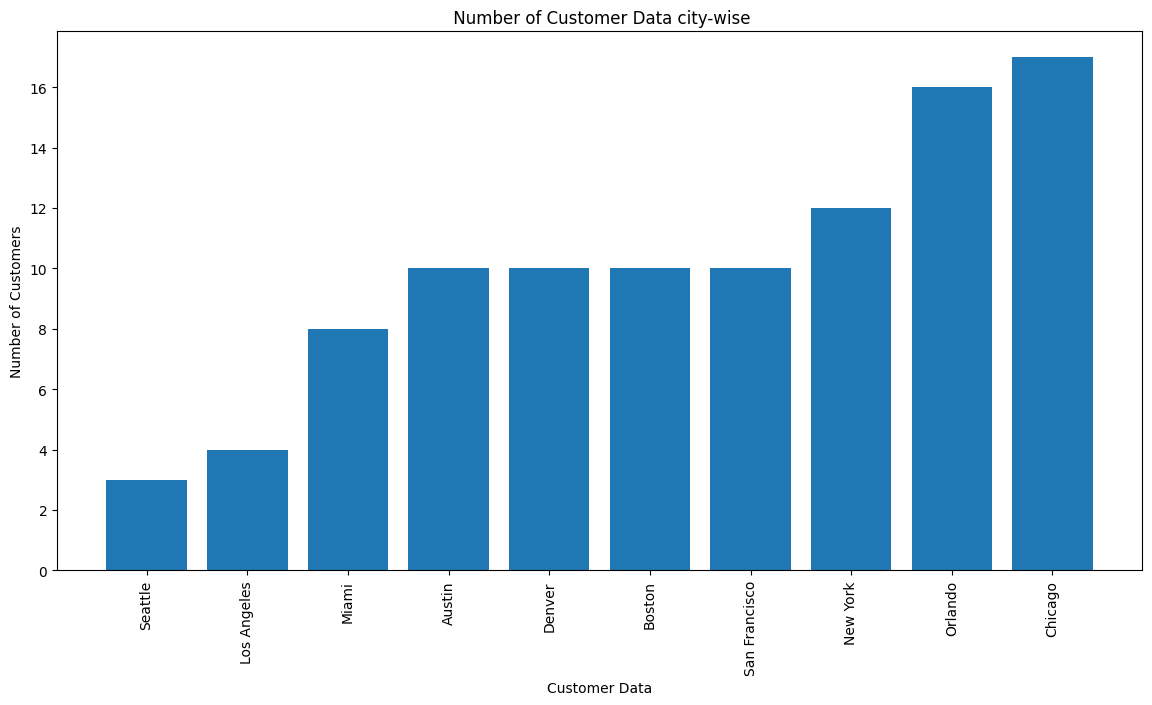

In [141]:
y = customer_data.groupby('city')["customer_id"].count().sort_values()
plt.figure(figsize=(14, 7))
plt.bar(y.index, y)
plt.xticks(rotation=90)
plt.title(" Number of Customer Data city-wise")
plt.xlabel("Customer Data")
plt.ylabel("Number of Customers")


- Identify the most frequent customers based on their order history

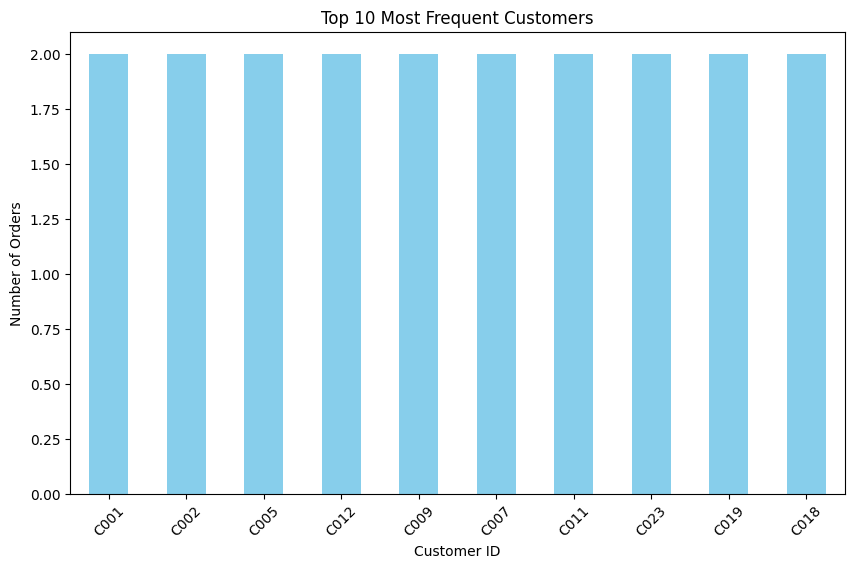

In [142]:
# Group by 'customer_id' and count the number of orders
frequent_customers = order_data.groupby('customer_id')['order_id'].count().sort_values(ascending=False)

# Display the most frequent customers
# print(frequent_customers.head(10))  # Display the top 10 most frequent customers

# Plotting the top 10 most frequent customers
plt.figure(figsize=(10, 6))
frequent_customers.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


`ProductAnalysis:`
- Determine the total number of products available by category.

category
Home & Kitchen    20
Apparel           10
Appliances        10
Electronics       10
Furniture         10
Outdoor           10
Personal Care     10
Sports            10
Stationery        10
Name: product_id, dtype: int64


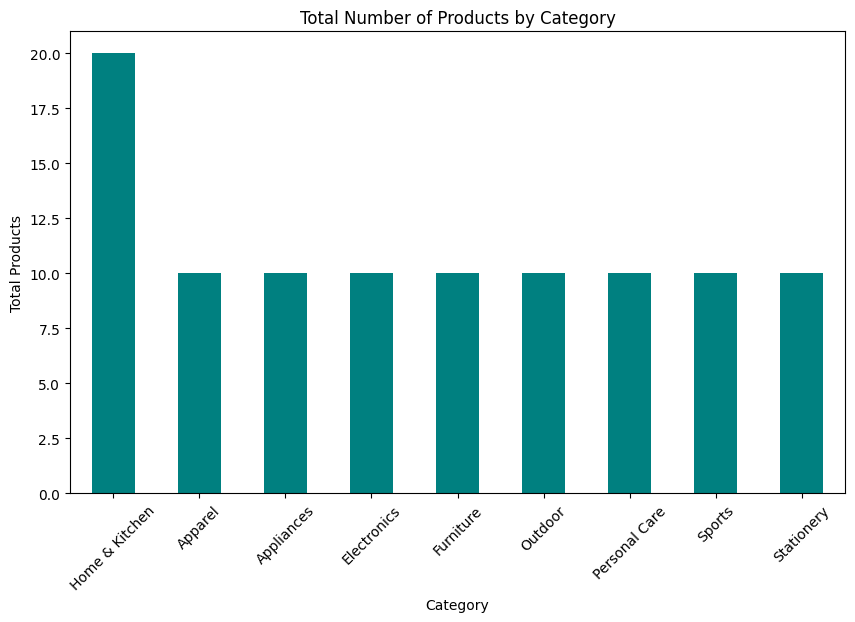

In [143]:
# Group by 'category' and count the number of products in each category
total_products_by_category = product_data.groupby('category')['product_id'].count().sort_values(ascending=False)

# Display the total number of products by category
print(total_products_by_category)

plt.figure(figsize=(10, 6))
total_products_by_category.plot(kind='bar', color='teal')
plt.title('Total Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Total Products')
plt.xticks(rotation=45)
plt.show()


- Analyze the distribution of products across sub-categories.

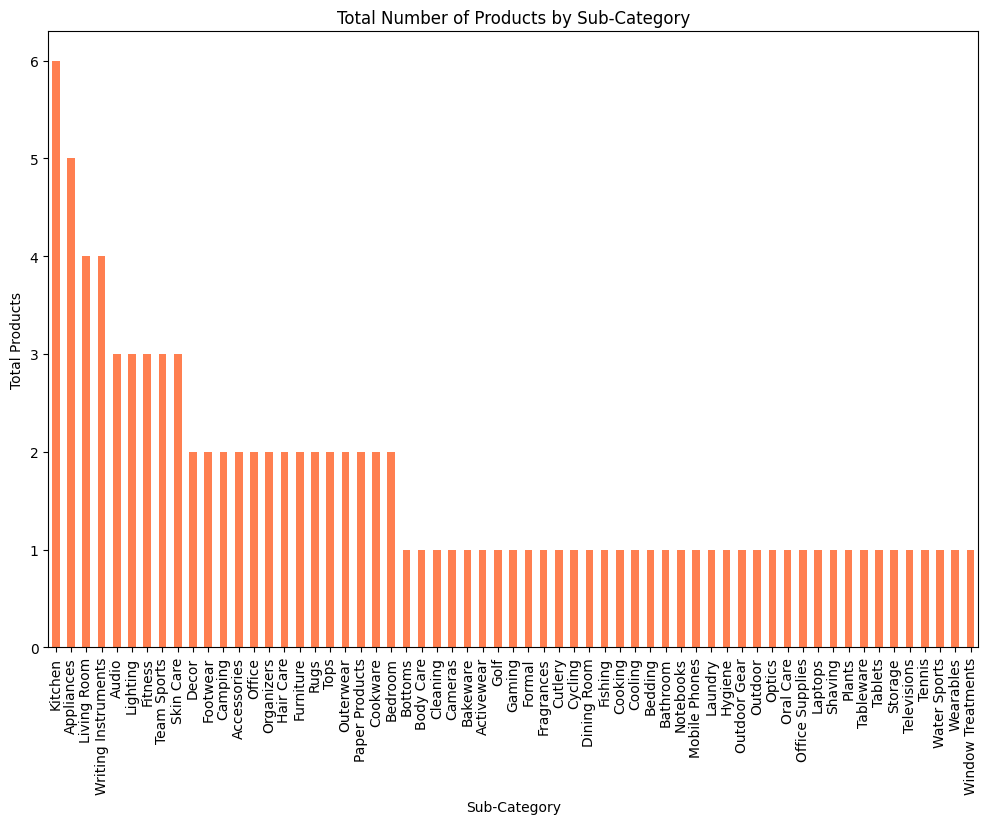

In [144]:
# Group by 'sub_category' and count the number of products in each sub-category
total_products_by_sub_category = product_data.groupby('sub_category')['product_id'].count().sort_values(ascending=False)

# Display the total number of products by sub-category
# print(total_products_by_sub_category)
plt.figure(figsize=(12, 8))
total_products_by_sub_category.plot(kind='bar', color='coral')
plt.title('Total Number of Products by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Products')
plt.xticks(rotation=90)
plt.show()


- Identify products with low stock levels.

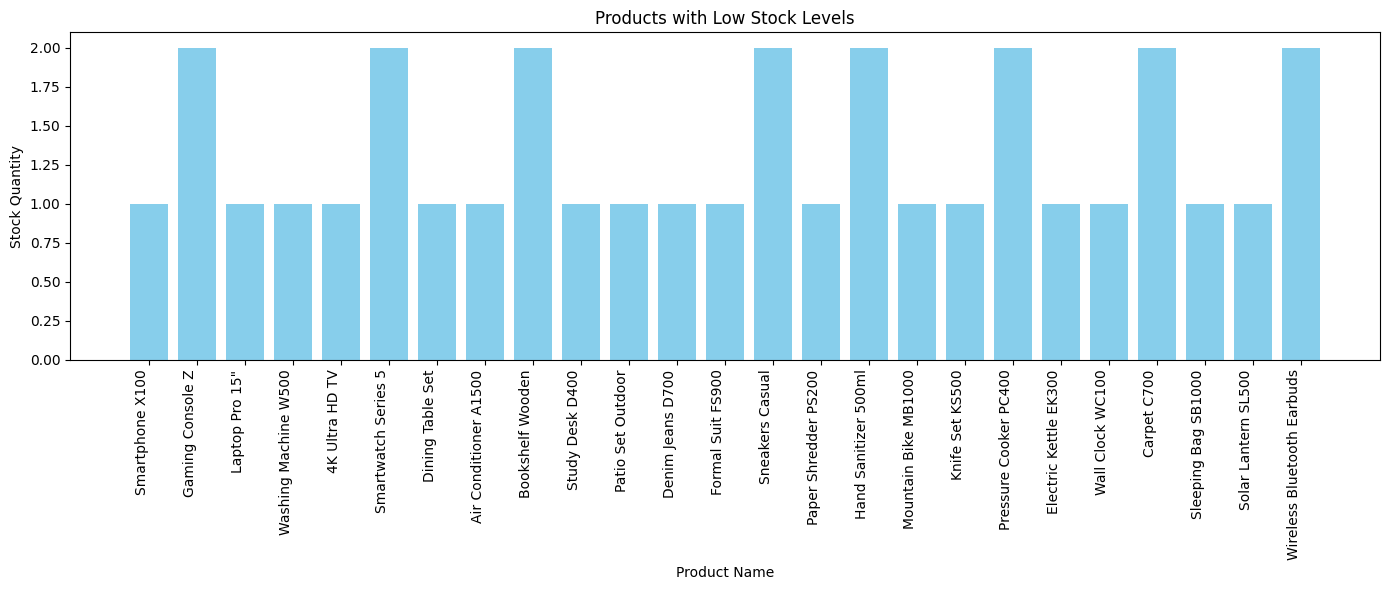

In [145]:
# Define the threshold for low stock levels
low_stock_threshold = 3

# Query to find products with stock levels below the threshold
sql = '''
SELECT p.product_id, p.product_name, o.quantity 
FROM product p
JOIN order_details o 
ON p.product_id = o.product_id
WHERE o.quantity < %s;
'''

# Execute the query
cr.execute(sql, (low_stock_threshold,))

# Fetch all results
low_stock_products = cr.fetchall()

# Prepare data for the bar chart
product_names = [product[1] for product in low_stock_products]
stock_quantities = [product[2] for product in low_stock_products]

# Create a bar chart
plt.figure(figsize=(14, 6))
plt.bar(product_names, stock_quantities, color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Stock Quantity')
plt.title('Products with Low Stock Levels')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()  # Adjust layout to make room for label rotation

# Display the bar chart
plt.show()


- Calculate the average, maximum, and minimum selling prices for products.

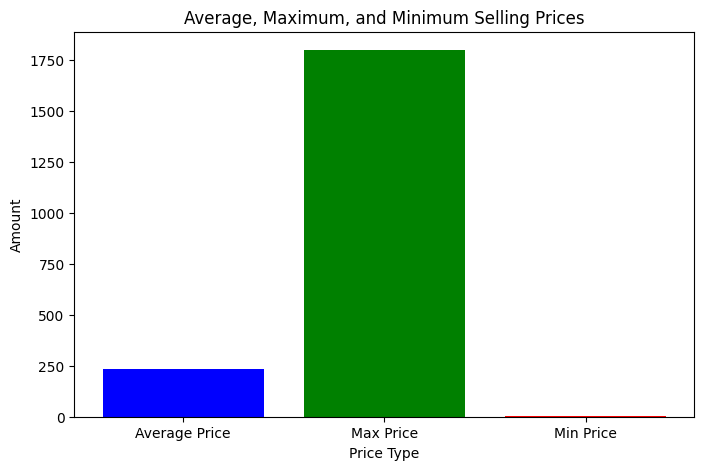

In [146]:
# SQL query to calculate average, max, and min selling prices
query = '''
SELECT 
    AVG(selling_price) AS average_price,
    MAX(selling_price) AS max_price,
    MIN(selling_price) AS min_price
FROM product;
'''

# Execute the query
cr.execute(query)

# Fetch the result
result = cr.fetchone()
labels = ['Average Price', 'Max Price', 'Min Price']
values = [result[0], result[1], result[2]]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.xlabel('Price Type')
plt.ylabel('Amount')
plt.title('Average, Maximum, and Minimum Selling Prices')
plt.show()

`OrderAnalysis:`
- Calculate the top 10 orders product-wise.


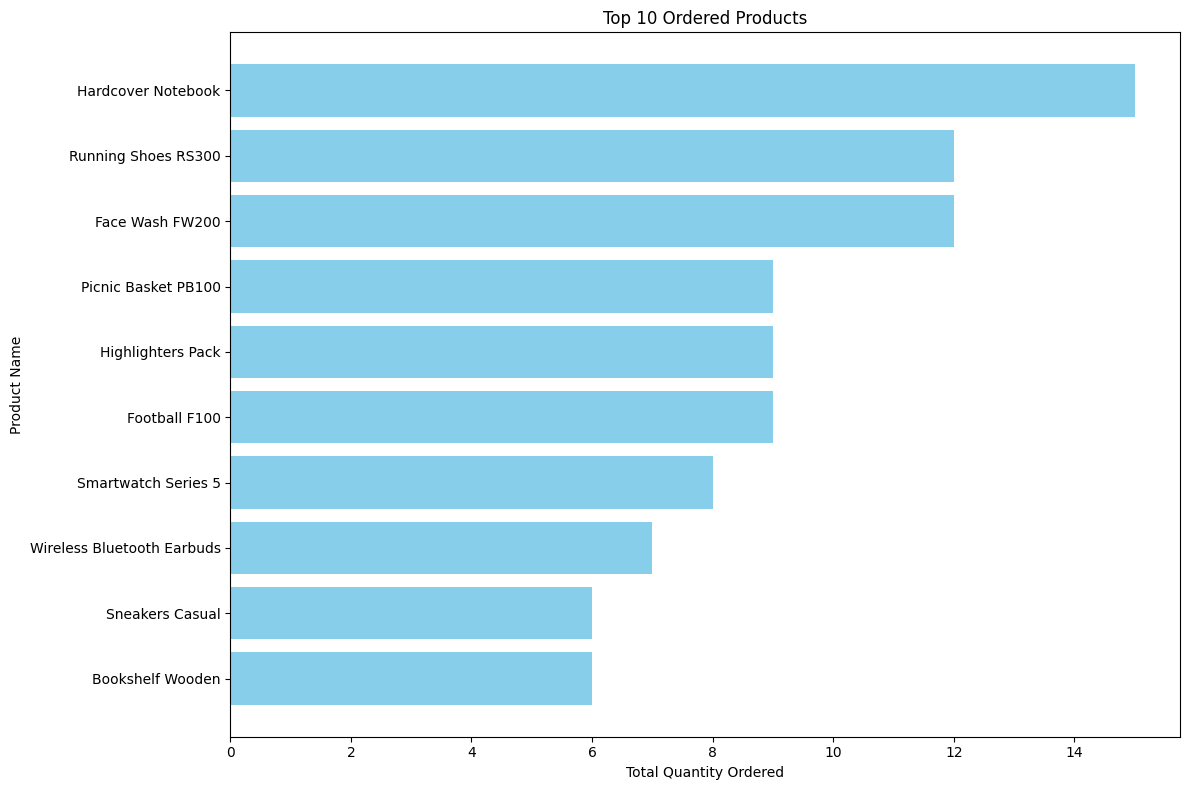

In [147]:
# Execute the SQL query and fetch results
sql = '''
SELECT p.product_name, SUM(o.quantity) AS total_quantity
FROM order_details o
JOIN product p ON o.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_quantity DESC
LIMIT 10;
'''
cr.execute(sql)
results = cr.fetchall()

# Prepare data for the bar chart
if results:
    product_names = [row[0] for row in results]
    total_quantities = [row[1] for row in results]
     
    # Create a bar chart
    plt.figure(figsize=(12, 8))
    plt.barh(product_names, total_quantities, color='skyblue')
    plt.xlabel('Total Quantity Ordered')
    plt.ylabel('Product Name')
    plt.title('Top 10 Ordered Products')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
    plt.tight_layout()

    # Display the bar chart
    plt.show()
else:
    print("No data returned from the query.")


- Analyze the order status distribution (e.g., pending, delivered).

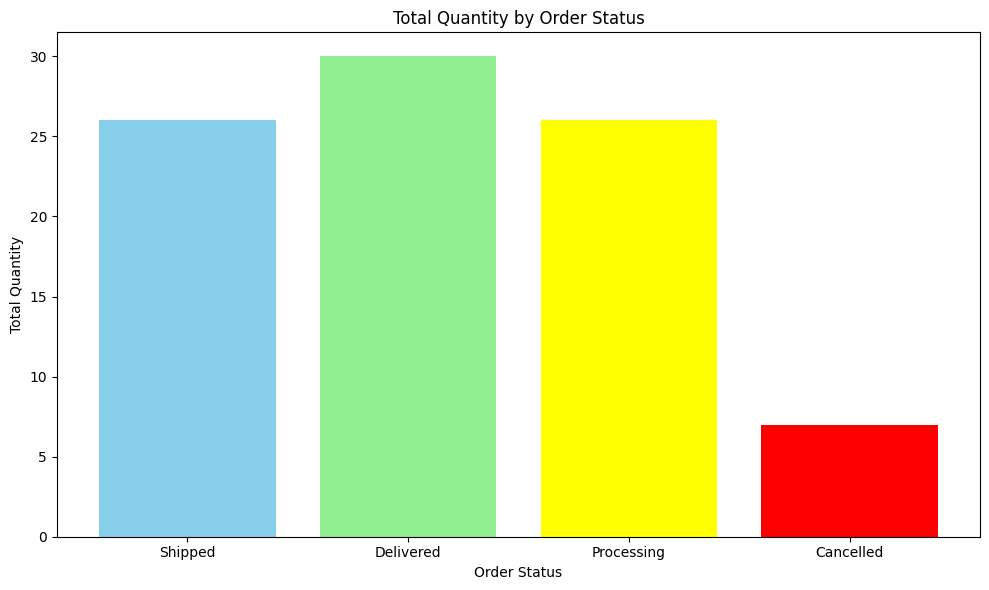

In [148]:
# Execute the SQL query and fetch results
sql = """
SELECT order_status, COUNT(*) 
FROM order_details 
GROUP BY order_status;
"""

cr.execute(sql)
results = cr.fetchall()

order_status = [row[0] for row in results]
total_quantities = [row[1] for row in results]

plt.figure(figsize=(10, 6))
plt.bar(order_status, total_quantities, color =["skyblue", "lightgreen", "yellow", "red"])
plt.xlabel("Order Status")
plt.ylabel("Total Quantity")
plt.title("Total Quantity by Order Status")
plt.tight_layout()
plt.show()

- Identify the most popular products based on order quantity.

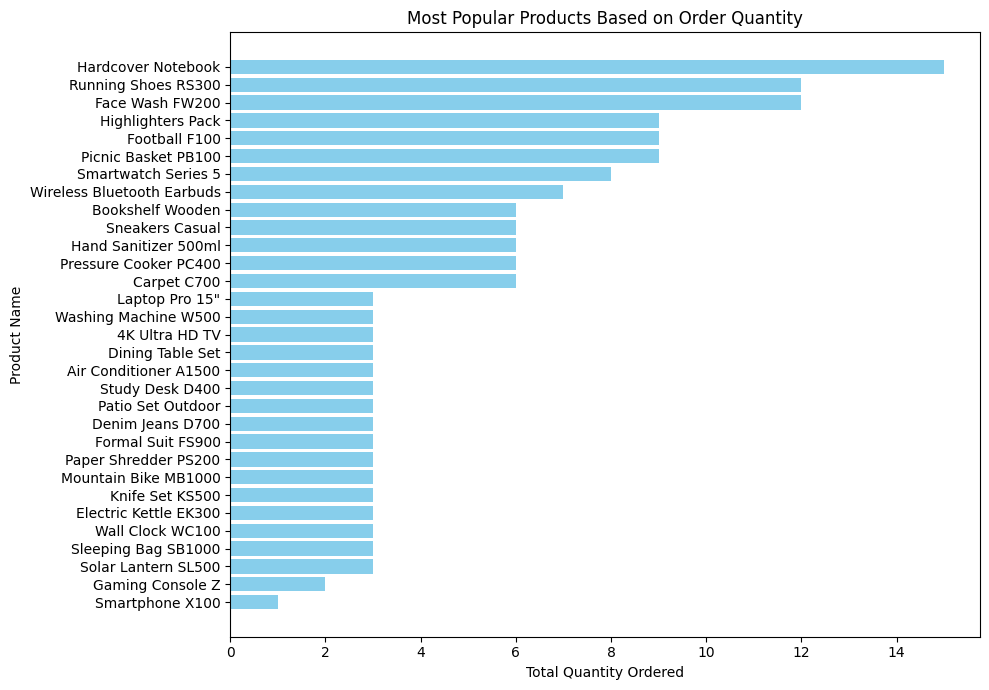

In [149]:
# Execute the SQL query and fetch results
sql = '''
SELECT p.product_name, SUM(o.quantity) AS total_quantity
FROM order_details o
JOIN product p ON o.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_quantity DESC;
'''

cr.execute(sql)
results = cr.fetchall()

# Prepare data for the bar chart
product_names = [row[0] for row in results]
total_quantities = [row[1] for row in results]

# Create a bar chart
plt.figure(figsize=(10, 7))
plt.barh(product_names, total_quantities, color='skyblue')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Name')
plt.title('Most Popular Products Based on Order Quantity')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.tight_layout()
plt.show()

`Sales Analysis:`
- Calculate total revenue generated from orders product wise

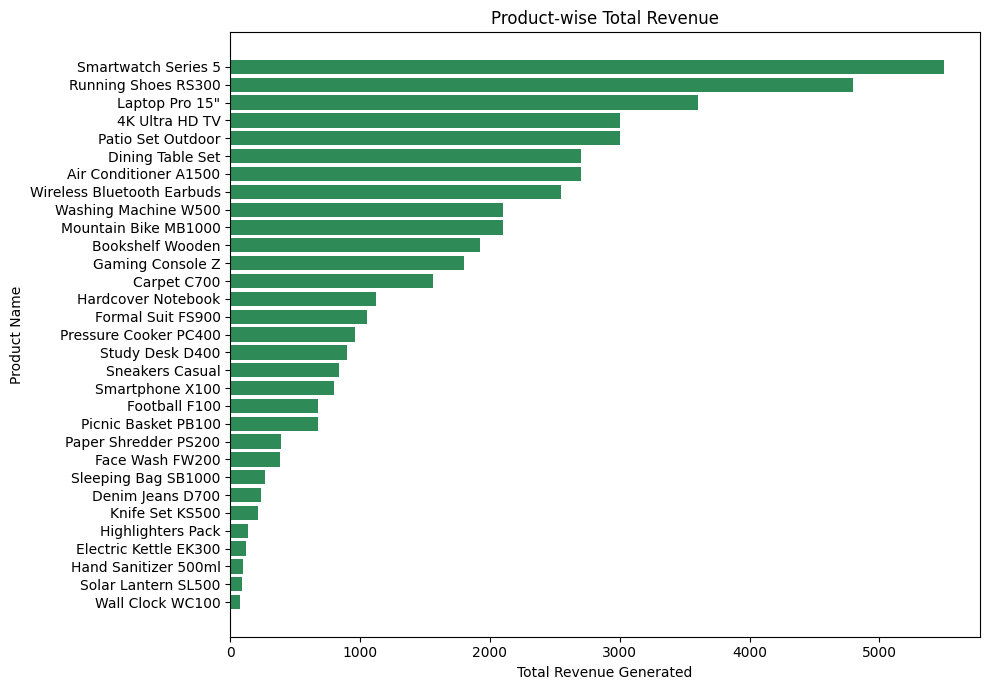

In [150]:
# Execute the SQL query and fetch results
sql = '''
SELECT P.PRODUCT_NAME, SUM(O.quantity * O.total_price)  AS total_revenue
FROM ORDER_DETAILS O
JOIN PRODUCT P ON O.product_id = P.product_id
GROUP BY P.PRODUCT_NAME
ORDER BY total_revenue DESC;
'''
cr.execute(sql)
results = cr.fetchall()

product_names = [row[0] for row in results]
total_revenues = [row[1] for row in results]

# Create a bar chart
plt.figure(figsize=(10, 7))
plt.barh(product_names, total_revenues, color='seagreen')
plt.xlabel('Total Revenue Generated')
plt.ylabel('Product Name')
plt.title('Product-wise Total Revenue')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.tight_layout()

# Display the bar chart
plt.show()

- Calculate total revenue product category wise percentage.

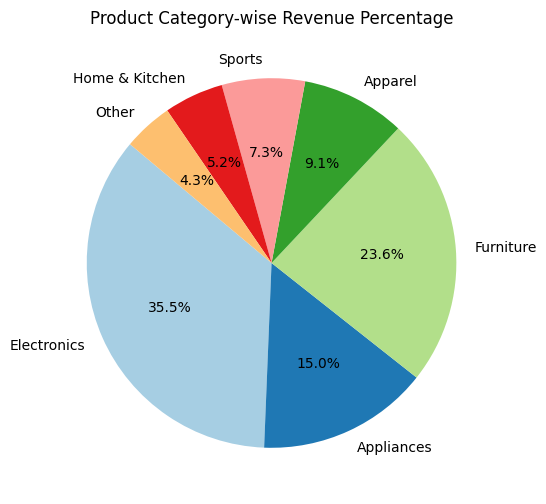

In [151]:
# Execute the SQL query to get category-wise revenue
sql = '''
SELECT p.category, SUM(o.quantity * p.selling_price) AS category_revenue
FROM order_details o
JOIN product p ON o.product_id = p.product_id
GROUP BY p.category;
'''

cr.execute(sql)
results = cr.fetchall()
categories = [row[0] for row in results]
category_revenues = [row[1] for row in results]

# Calculate the total revenue
total_revenue = sum(category_revenues)

# Define a threshold percentage below which categories will be grouped into "Other"
threshold_percentage = 5.0
other_revenue = 0
filtered_categories = []
filtered_revenues = []

# Aggregate small categories into "Other"
for i in range(len(category_revenues)):
    percentage = (category_revenues[i] / total_revenue) * 100
    if percentage < threshold_percentage:
        other_revenue += category_revenues[i]
    else:
        filtered_categories.append(categories[i])
        filtered_revenues.append(category_revenues[i])

# Add "Other" category if there are small percentages
if other_revenue > 0:
    filtered_categories.append('Other')
    filtered_revenues.append(other_revenue)

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(filtered_revenues, labels=filtered_categories, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Product Category-wise Revenue Percentage')
plt.show()

- Calculate the total revenue generated from all orders

Total Revenue: 31997.379791259766


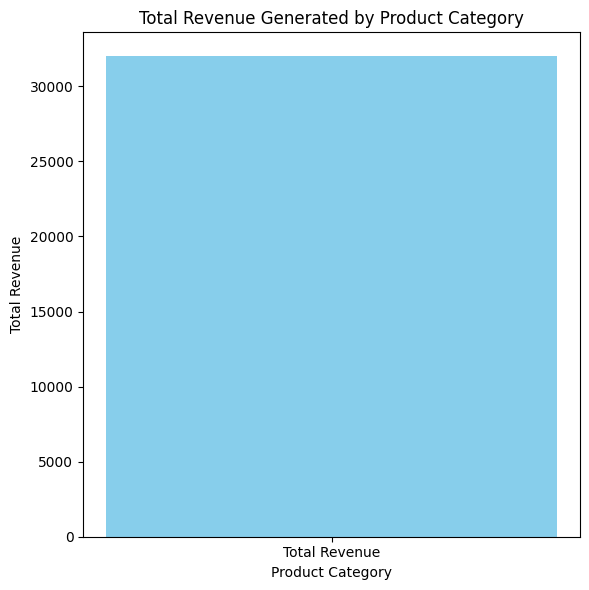

In [152]:
# Execute the SQL query to calculate total revenue
sql = '''
SELECT SUM(o.quantity * p.selling_price) AS total_revenue
FROM order_details o
JOIN product p ON o.product_id = p.product_id;
'''

cr.execute(sql)
total_revenue_result = cr.fetchone()
print("Total Revenue:", total_revenue_result[0])



# Create a bar chart
plt.figure(figsize=(6, 6))
plt.bar('Total Revenue', total_revenue_result[0], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Generated by Product Category')
plt.tight_layout()

# Display the bar chart
plt.show()

- Identify the most profitable products based on the difference between original and selling prices.

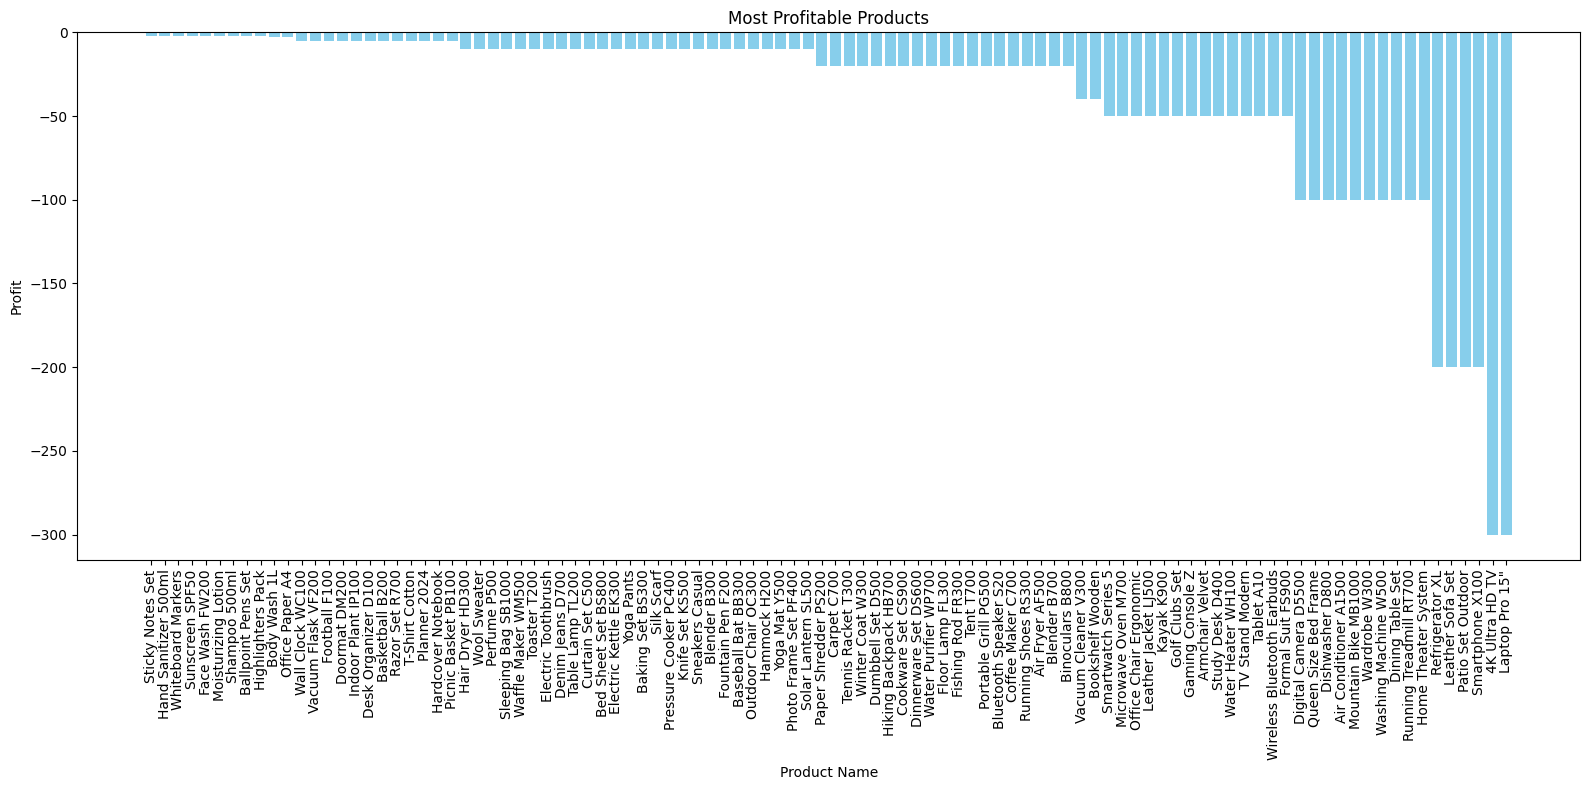

In [153]:
sql = '''
SELECT product_name, (selling_price - original_price) AS profit
FROM product
ORDER BY profit DESC;
'''
cr.execute(sql)
results = cr.fetchall()

product_name = [row[0] for row in results]
profit = [row[1] for row in results]

# Plot the bar chart
plt.figure(figsize=(16, 8))
plt.bar(product_name, profit, color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Profit')
plt.title('Most Profitable Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

`Customer Order Patterns:`
- Identify product names with the highest and lowest order quantities.

('Hardcover Notebook', 15.0)


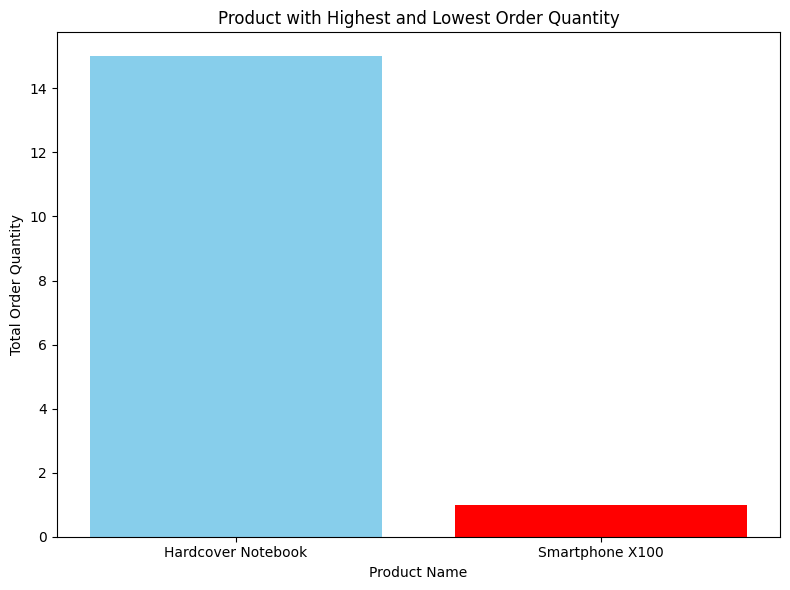

In [154]:
# Query to find the product with the highest order quantity
query_highest = """
SELECT p.product_name, SUM(od.quantity) AS total_quantity
FROM order_details od
JOIN product p ON od.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_quantity DESC
LIMIT 1;
"""


# Query to find the product with the lowest order quantity
query_lowest = """
SELECT p.product_name, SUM(od.quantity) AS total_quantity
FROM order_details od
JOIN product p ON od.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_quantity ASC
LIMIT 1;
"""

# Execute the queries
cr.execute(query_highest)
highest_product = cr.fetchone()
print(highest_product)
cr.execute(query_lowest)
lowest_product = cr.fetchone()

# Display the results
plt.figure(figsize=(8, 6))
plt.bar([highest_product[0], lowest_product[0]], [highest_product[1], lowest_product[1]], color=['skyblue', 'red'])
plt.xlabel('Product Name')
plt.ylabel('Total Order Quantity')
plt.title('Product with Highest and Lowest Order Quantity')
plt.tight_layout()
plt.show()

- Identify customers with the highest and lowest order quantities by customer name.

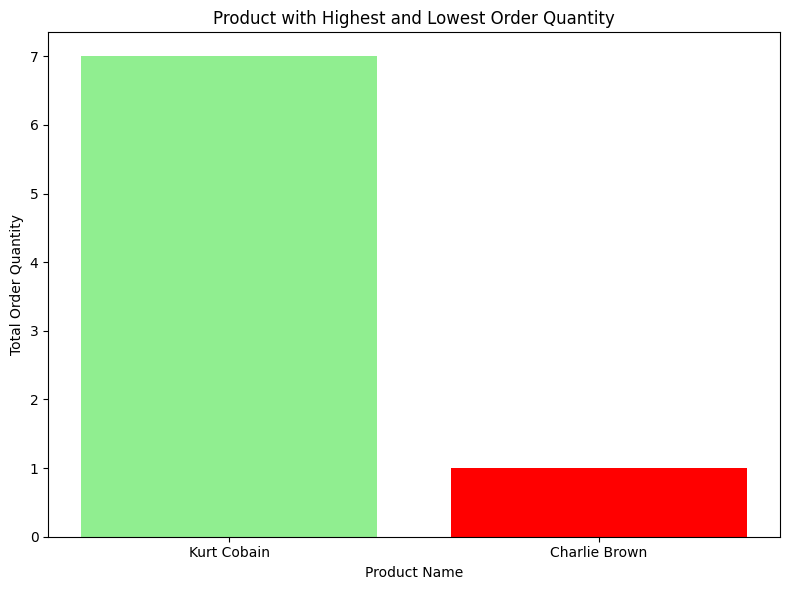

In [155]:
# Query to find the customer with the highest order quantity
query_highest = """
SELECT c.name, SUM(od.quantity) AS total_quantity
FROM order_details od
JOIN customer c ON od.customer_id = c.customer_id
GROUP BY c.name
ORDER BY total_quantity DESC
LIMIT 1;
"""

# Query to find the customer with the lowest order quantity
query_lowest = """
SELECT c.name, SUM(od.quantity) AS total_quantity
FROM order_details od
JOIN customer c ON od.customer_id = c.customer_id
GROUP BY c.name
ORDER BY total_quantity ASC
LIMIT 1;
"""

# Execute the queries
cr.execute(query_highest)
highest_customer = cr.fetchone()

cr.execute(query_lowest)
lowest_customer = cr.fetchone()


# Display the results
plt.figure(figsize=(8, 6))
plt.bar([highest_customer[0], lowest_customer[0]], [highest_customer[1], lowest_customer[1]], color=['lightgreen', 'red'])
plt.xlabel('Product Name')
plt.ylabel('Total Order Quantity')
plt.title('Product with Highest and Lowest Order Quantity')
plt.tight_layout()


- Determine the most preferred payment modes.


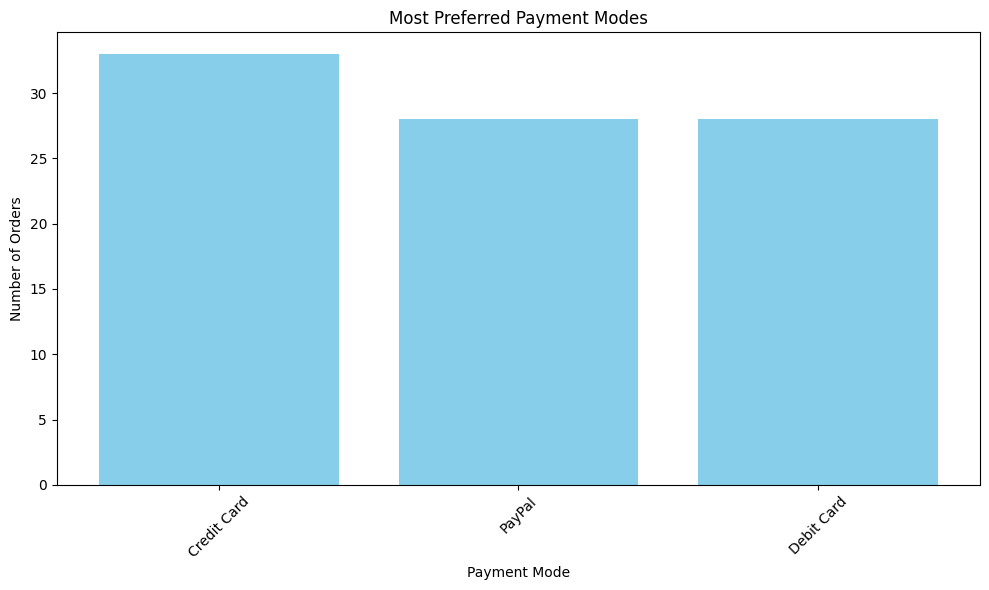

In [156]:
# Query to find the most preferred payment modes
query = """
SELECT payment_mode, COUNT(*) AS order_count
FROM order_details
GROUP BY payment_mode
ORDER BY order_count DESC;
"""

# Execute the query and load the results into a DataFrame
cr.execute(query)
results = cr.fetchall()

payment_mode =  [row[0] for row in results]
order_count = [row[1] for row in results]

# Display the results
plt.figure(figsize=(10, 6))
plt.bar(payment_mode, order_count, color='skyblue')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.title('Most Preferred Payment Modes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`Time-based Analysis:`
- Month wise total sales.

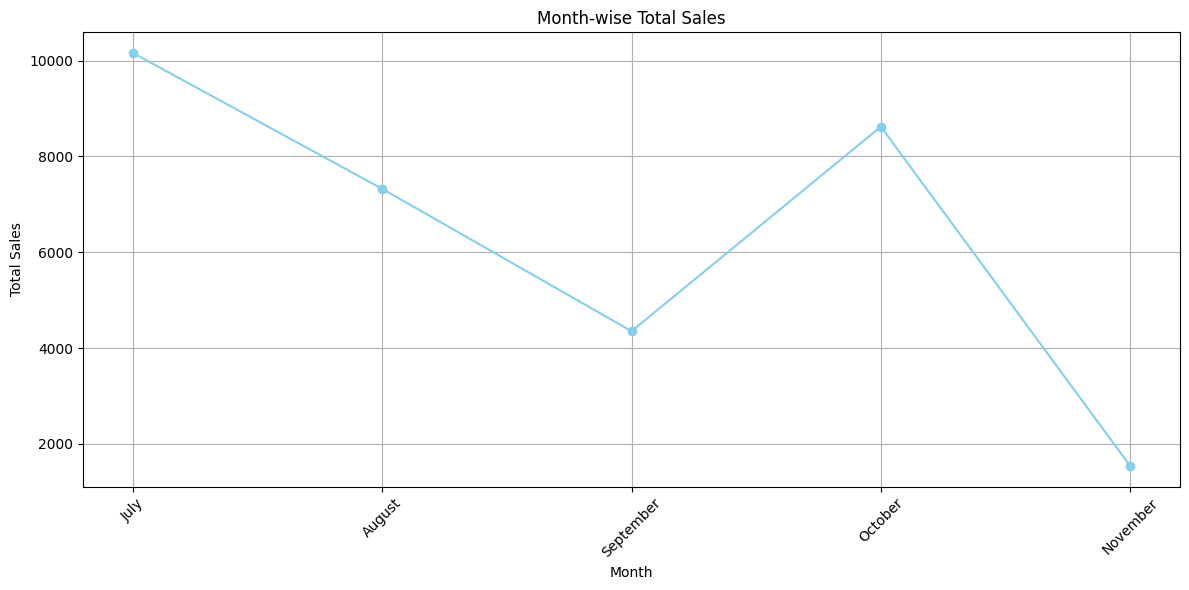

In [157]:
# Query to get month-wise total sales
query = """
SELECT DATE_FORMAT(order_date, '%m') AS month, SUM(total_price) AS total_sales
FROM order_details
GROUP BY month
ORDER BY month;
"""

cr.execute(query)
results = cr.fetchall()

month = [row[0] for row in results]
total_sales = [row[1] for row in results]

month_names = {
    '01': 'January', '02': 'February', '03': 'March', '04': 'April',
    '05': 'May', '06': 'June', '07': 'July', '08': 'August',
    '09': 'September', '10': 'October', '11': 'November', '12': 'December'
}
month = [month_names[str(row[0])] for row in results]

plt.figure(figsize=(12, 6))
plt.plot(month, total_sales, marker='o', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Month-wise Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- Month and year wise total sales


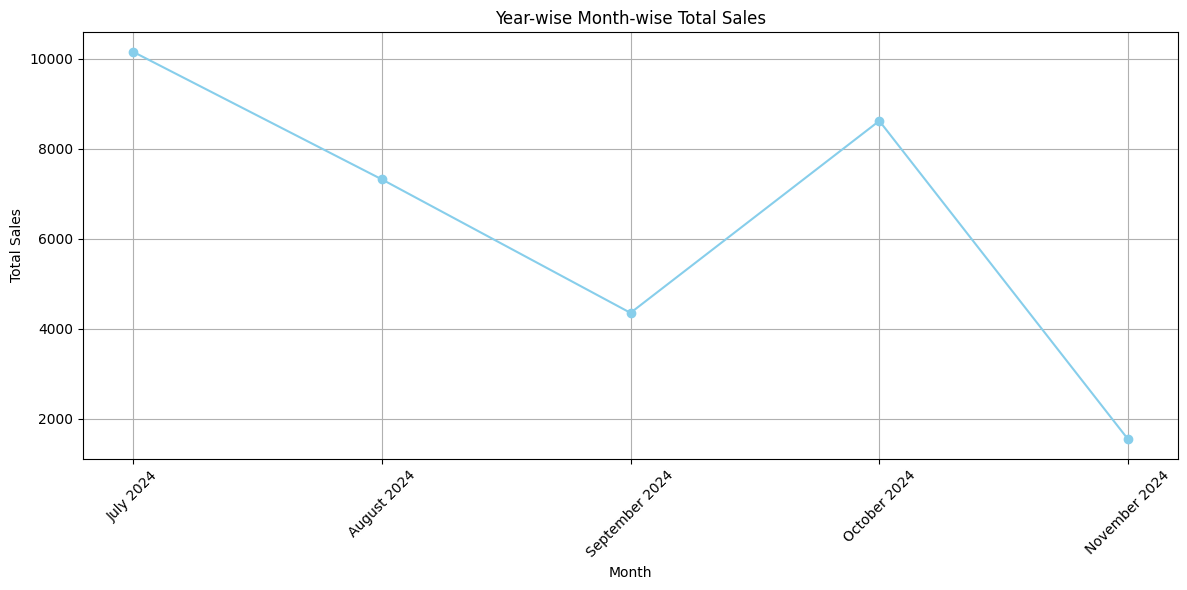

In [158]:
# Query to get month-wise total sales
query = """
SELECT DATE_FORMAT(order_date, '%m-%Y') AS month, SUM(total_price) AS total_sales
FROM order_details
GROUP BY month
ORDER BY month;
"""

cr.execute(query)
results = cr.fetchall()

month_year  = [row[0] for row in results]
total_sales = [row[1] for row in results]

month_names = {
    '01': 'January', '02': 'February', '03': 'March', '04': 'April',
    '05': 'May', '06': 'June', '07': 'July', '08': 'August',
    '09': 'September', '10': 'October', '11': 'November', '12': 'December'
}
month_year = [month_names[month.split('-')[0]] + ' ' + month.split('-')[1] for month in month_year]

# Display the results
plt.figure(figsize=(12, 6))
plt.plot(month_year, total_sales, marker='o', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Year-wise Month-wise Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- Identify peak order date.


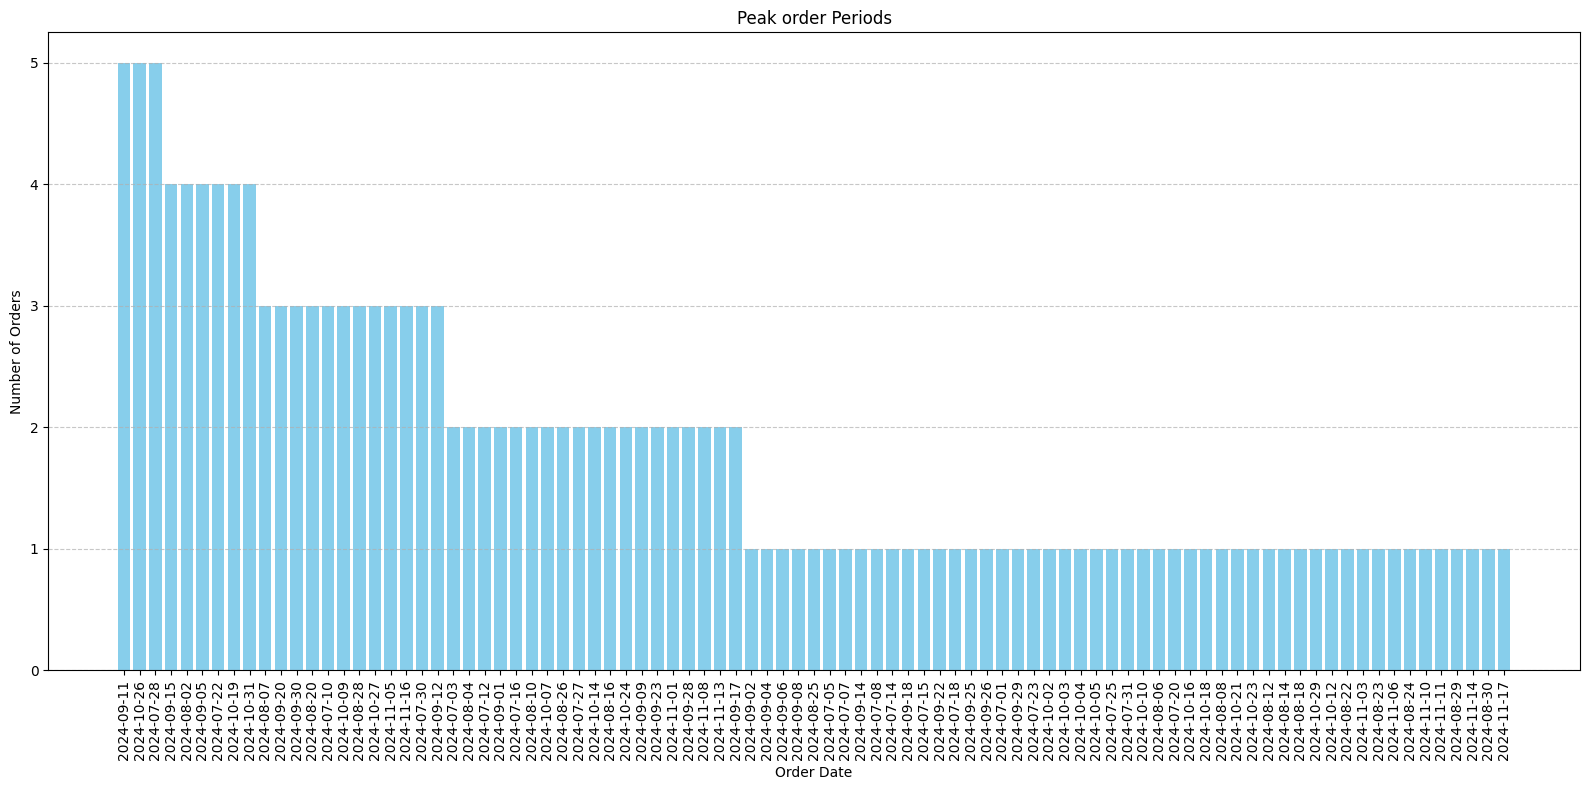

In [159]:
# Query to get the peak order date
query = """
SELECT DATE_FORMAT(order_date, '%Y-%m-%d'), SUM(quantity) AS total_sales
FROM order_details
GROUP BY order_date
ORDER BY total_sales DESC
"""

cr.execute(query)
result = cr.fetchall()

# Extract the peak order date and total sales
dates = [row[0] for row in result]
sales = [row[1] for row in result]

# Plot bar chart
plt.figure(figsize=(16, 8))
plt.bar(dates, sales, color='skyblue')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.title('Peak order Periods')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


`Geographical Analysis:`
- Explore the distribution of customers across different cities.

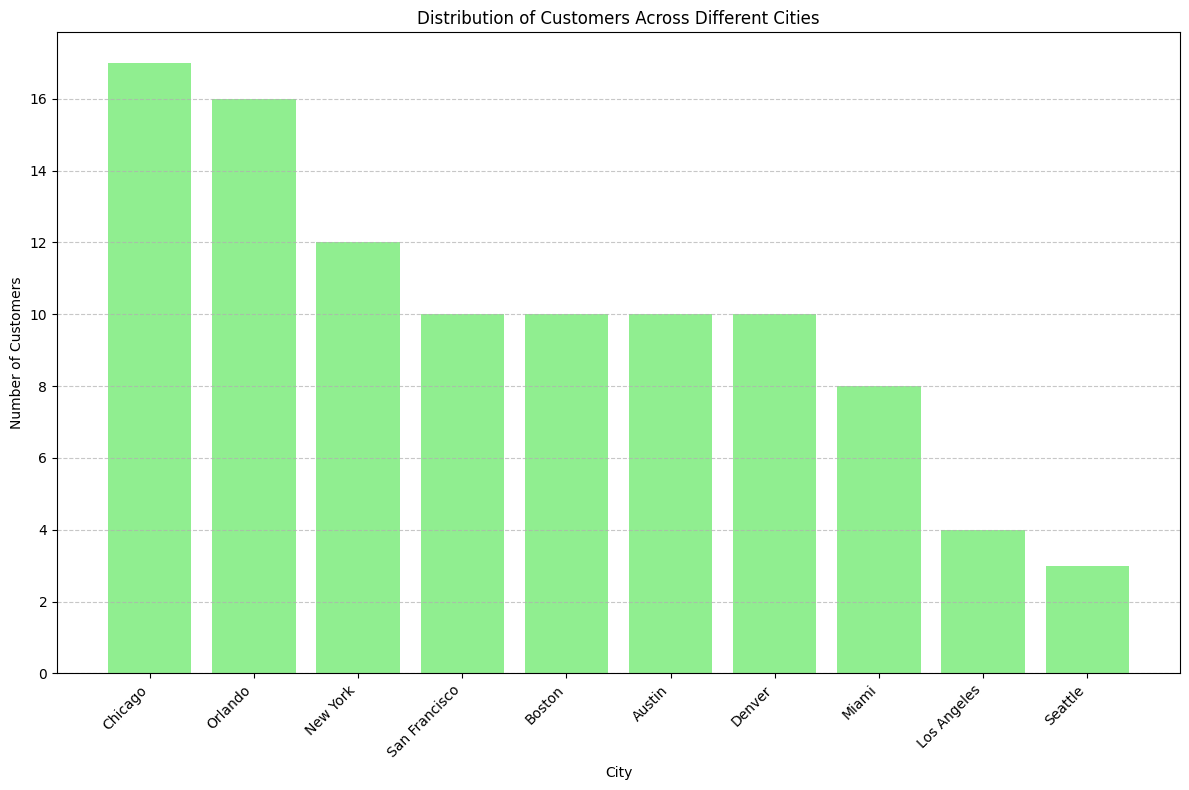

In [160]:
# Query to get customer distribution by city
query = """
SELECT city, COUNT(customer_id) AS customer_count
FROM customer
GROUP BY city
ORDER BY customer_count DESC;
"""

cr.execute(query)
results = cr.fetchall()

# Extract cities and customer counts
cities = [row[0] for row in results]
customer_counts = [row[1] for row in results]


# Plot bar chart
plt.figure(figsize=(12, 8))
plt.bar(cities, customer_counts, color='lightgreen')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across Different Cities')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Analyze whether certain products or categories are more popular in a specific city.


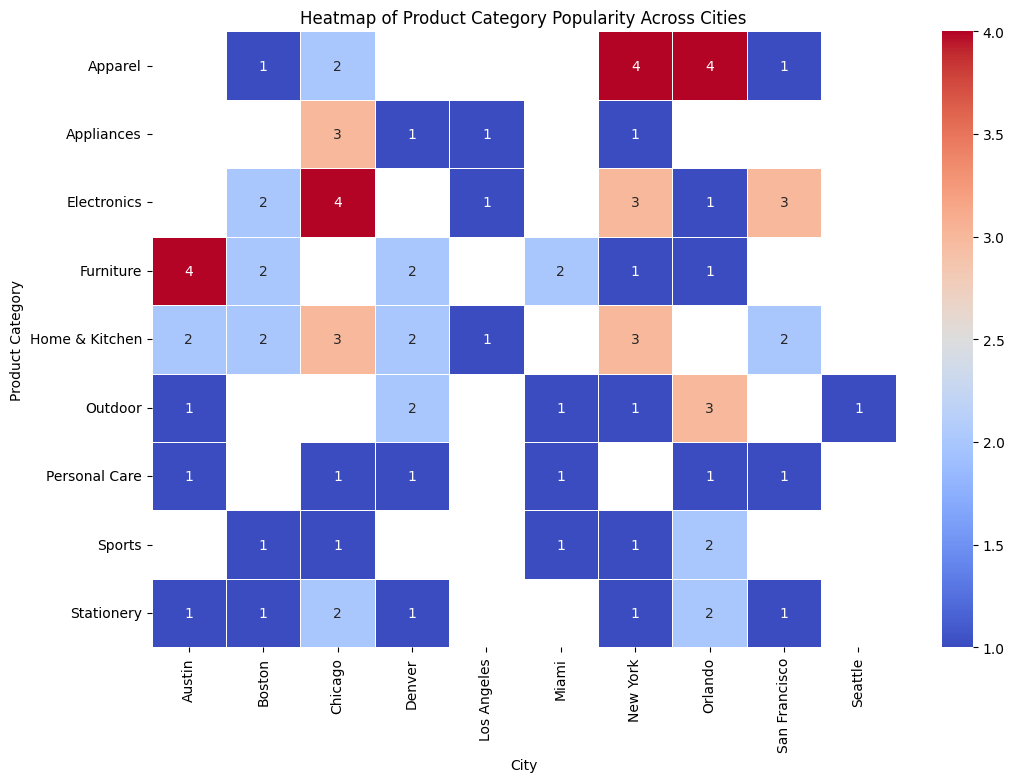

In [161]:
# Query to fetch city-category order data
query = """
SELECT city, category, COUNT(order_id) AS order_count
FROM order_details o
JOIN customer c ON o.customer_id = c.customer_id
JOIN product p ON o.product_id = p.product_id
GROUP BY city, category
ORDER BY city, category;
"""

cr.execute(query)
results = cr.fetchall()

# Convert the results to a DataFrame
df = pd.DataFrame(results, columns=['City', 'Category', 'Order Count'])

# Pivot the DataFrame for the heatmap
pivot_table = df.pivot(index='Category', columns='City', values='Order Count')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='g', linewidths=.5)
plt.title('Heatmap of Product Category Popularity Across Cities')
plt.xlabel('City')
plt.ylabel('Product Category')
plt.show()


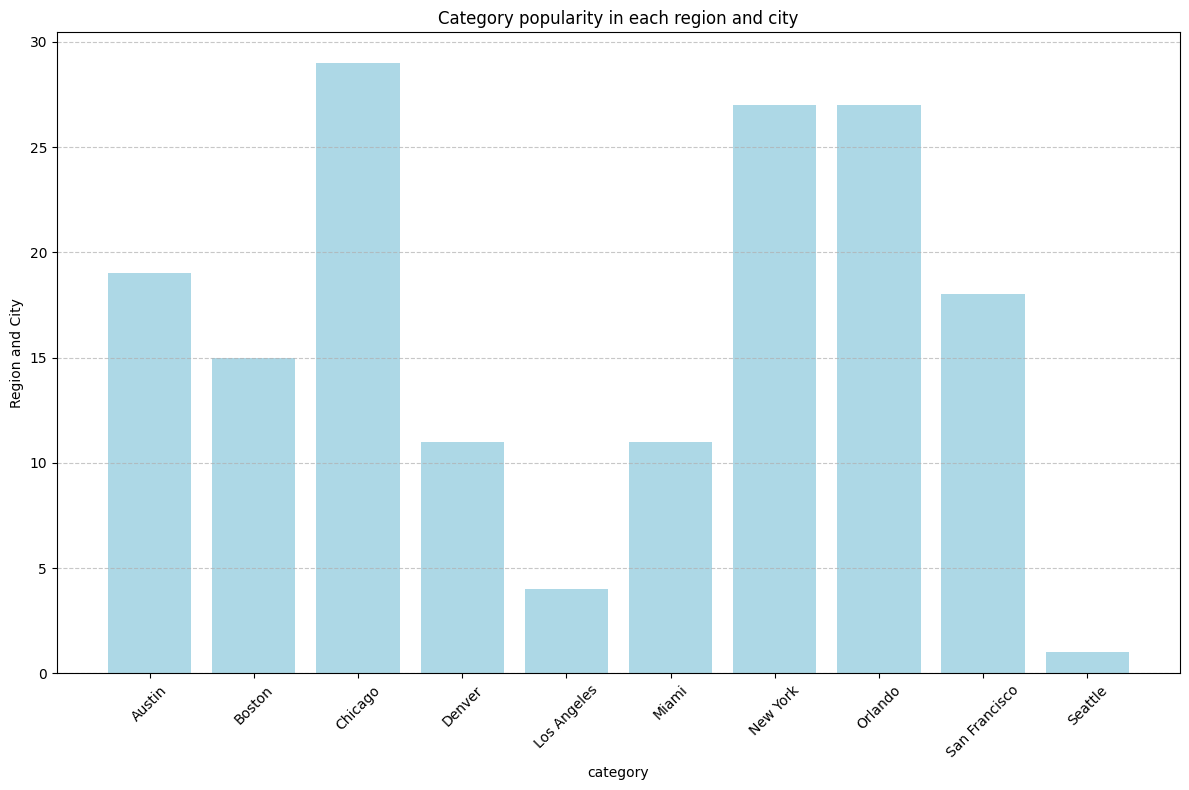

In [166]:
# Query to get sales data by city and product
query = """
SELECT c.city, SUM(o.quantity) AS total_sales
FROM customer c
JOIN order_details o ON c.customer_id = o.customer_id
GROUP BY c.city
ORDER BY c.city, total_sales DESC;
"""
# query = """
# SELECT c.city, p.product_name, SUM(o.quantity) AS total_sales
# FROM customer c
# JOIN order_details o ON c.customer_id = o.customer_id
# Join product p ON o.product_id = p.product_id
# GROUP BY c.city, p.product_name
# ORDER BY c.city, total_sales DESC;
# """

cr.execute(query)
results = cr.fetchall()
city = [row[0] for row in results]
total_sales = [row[1] for row in results]


# Plot bar chart for a specific city

plt.figure(figsize=(12, 8))
plt.bar(city, total_sales, color='lightblue')
plt.xlabel('category')
plt.ylabel('Region and City')
plt.title(f'Category popularity in each region and city')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

`Product Performance:`
- Identify the best-selling products.


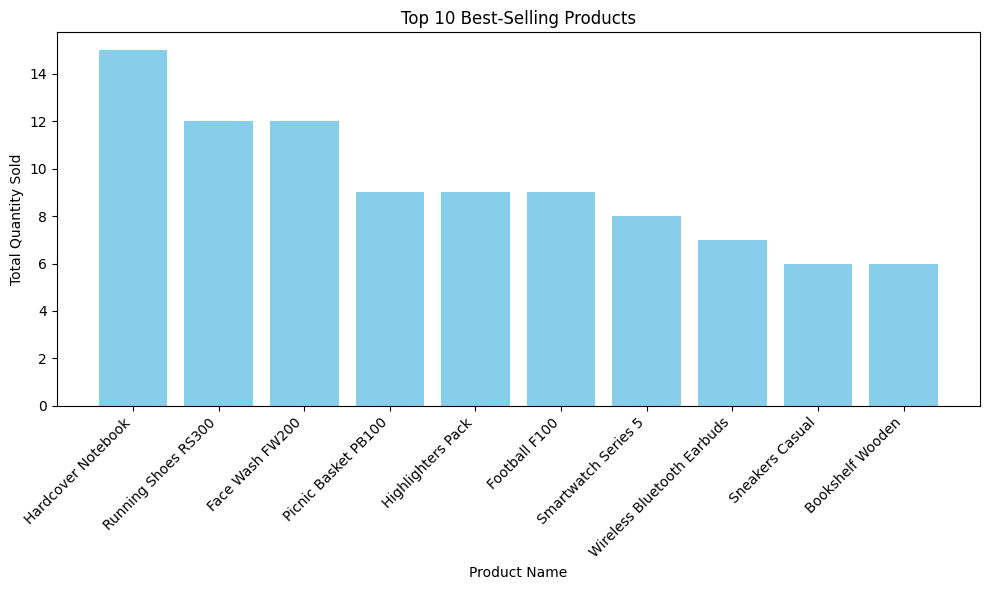

In [167]:
# Query to identify best-selling products
query = """
SELECT p.product_name, SUM(o.quantity) AS total_quantity_sold
FROM order_details o
JOIN product p ON o.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_quantity_sold DESC
LIMIT 10;
"""

cr.execute(query)
results = cr.fetchall()

product_name = [row[0] for row in results]
total_quantity_sold = [row[1] for row in results]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(product_name, total_quantity_sold, color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Identify top 10 slow-moving products based on low sales.

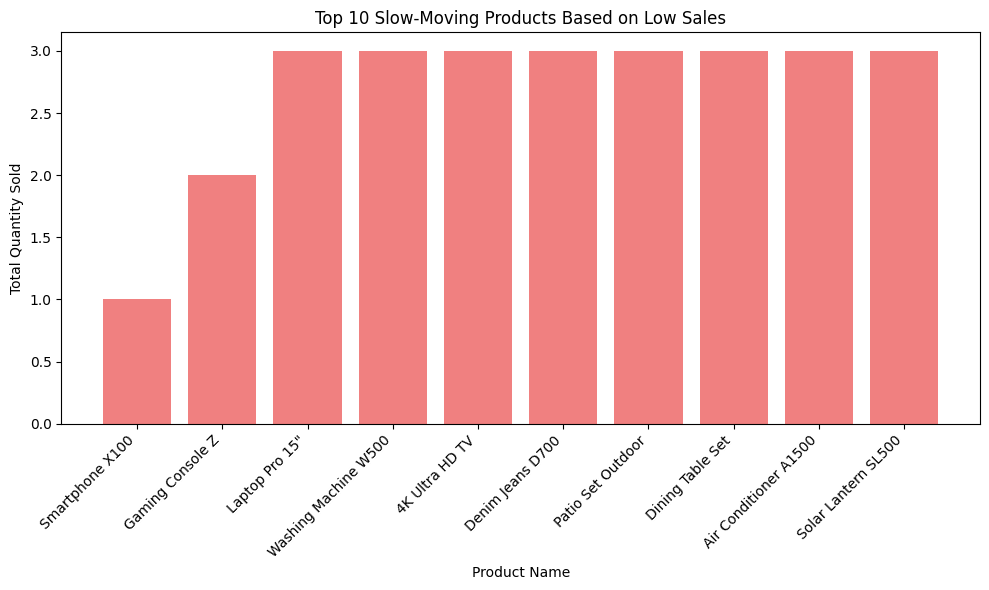

In [169]:
# Query to identify top 10 slow-moving products based on low sales
query = """
SELECT p.product_name, SUM(o.quantity) AS total_quantity_sold
FROM order_details o
JOIN product p ON o.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_quantity_sold ASC
LIMIT 10;
"""

cr.execute(query)
results = cr.fetchall()

# Extract product names and quantities into lists
slow_moving_product_names = [row[0] for row in results]
low_quantities = [row[1] for row in results]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(slow_moving_product_names, low_quantities, color='lightcoral')
plt.title('Top 10 Slow-Moving Products Based on Low Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# cr.execute(
# '''
# drop table if exists order_details;
# drop table if exists product;
# drop table if exists customer;
# ''')